<a href="https://colab.research.google.com/github/ranubansal/DSML-Projects/blob/main/Ad_Ease_Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ad Ease Website analytics Business Case**

● Ad Ease is an ads and marketing-based company helping businesses elicit
maximum clicks @ minimum cost.

● AdEase is an ad infrastructure to help businesses promote themselves easily,
effectively, and economically.

● Ad ease trying to understand the per page view report for different wikipedia
pages for 550 days, and forecasting the number of views so that you can predict
and optimize the ad placement for your clients.

● By leveraging data science and time series, Ad Ease can forecast page visits for different languages.


**Purpose**
You are working in the Data Science team of Ad ease trying to understand the per page view report for different wikipedia pages for 550 days, and forecasting the number of views so that you can predict and optimize the ad placement for your clients. You are provided with the data of 145k wikipedia pages and daily view count for each of them. Your clients belong to different regions and need data on how their ads will perform on pages in different languages.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from locale import normalize

In [7]:
!wget /content/drive/MyDrive/Ad Ease time series/train_1.csv

/content/drive/MyDrive/Ad: Scheme missing.
--2024-09-16 11:35:06--  http://ease/
Resolving ease (ease)... failed: Name or service not known.
wget: unable to resolve host address ‘ease’
--2024-09-16 11:35:06--  http://time/
Resolving time (time)... failed: Name or service not known.
wget: unable to resolve host address ‘time’
--2024-09-16 11:35:06--  http://series/train_1.csv
Resolving series (series)... failed: Name or service not known.
wget: unable to resolve host address ‘series’


In [8]:
df= pd.read_csv("/content/drive/MyDrive/Ad Ease time series/train_1.csv")

In [9]:
df.head()

Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN         NaN   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-09  ...  2016-12-22  2016-12-23  2016-12-24  2016-12-25  \
0        26.0  ...        32.0        63.0        15.0        26.0   
1        10.0  ...        17.0        42.0        28.0        15.0   
2         4.0  ...         3.0         1.0         1.0         7.0   
3        11.0  ...        32.0        10.0        26.0        27.0   
4         NaN  ...        48.0         9.0        25.0        13.0   

   2016-12-26  2016-12-27  2016-12-28  2016-12-29  2016-12-30  2016-12-31  
0        14.0        20.0        22.0        19.0        18.0        20.0  
1         9.0        30.0        52.0        45.0        26.0        20.0  
2         4.0         4.0         6.0         3.0         4.0        17.0  
3        16.0        11.0        17.0        19.0        10.0        11.0  
4         3.0        11.0        27.0        13.0        36.0        10.0  

[5 rows x 551 columns]

In [10]:
df.shape

(145063, 551)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [12]:
!wget /content/drive/MyDrive/Ad Ease time series/Exog_Campaign_eng.csv


/content/drive/MyDrive/Ad: Scheme missing.
--2024-09-16 11:35:23--  http://ease/
Resolving ease (ease)... failed: Name or service not known.
wget: unable to resolve host address ‘ease’
--2024-09-16 11:35:23--  http://time/
Resolving time (time)... failed: Name or service not known.
wget: unable to resolve host address ‘time’
--2024-09-16 11:35:23--  http://series/Exog_Campaign_eng.csv
Resolving series (series)... failed: Name or service not known.
wget: unable to resolve host address ‘series’


In [13]:
Exog_Campaign_eng= pd.read_csv("/content/drive/MyDrive/Ad Ease time series/Exog_Campaign_eng.csv")

In [14]:
Exog_Campaign_eng.head()

Exog
0     0
1     0
2     0
3     0
4     0

There's 1 for dates with campaigns and 0 for remaining dates. It is to be treated as an exogenous variable for models when training and forecasting data for pages in english.


In [15]:
Exog_Campaign_eng.shape

(550, 1)

In [16]:
Exog_Campaign_eng.value_counts()

Exog
0       496
1        54
Name: count, dtype: int64

Exog_Campaign_eng have 550 rows and 1 coulmn.
It also give the data that special events count is 54.

In [17]:
df['Page'][0]

'2NE1_zh.wikipedia.org_all-access_spider'

In [18]:
df['Page'][10000]

'Ohi_Day_en.wikipedia.org_desktop_all-agents'

In [19]:
df['Page'][1000]

'大魯閣草衙道_zh.wikipedia.org_all-access_spider'

page name is in the format of
The page name contains data in this format:

SPECIFIC NAME _ LANGUAGE.wikipedia.org _ ACCESS TYPE _ ACCESS ORIGIN

In [20]:
df1= df.copy()

In [21]:
df1.loc[:, 'Npage']= df1.loc[:, 'Page'].apply(lambda x : x.split("_"))

In [22]:
df1['Npage'].head(10)

0         [2NE1, zh.wikipedia.org, all-access, spider]
1          [2PM, zh.wikipedia.org, all-access, spider]
2           [3C, zh.wikipedia.org, all-access, spider]
3      inute, zh.wikipedia.org, all-access, spider]
4    [52, Hz, I, Love, You, zh.wikipedia.org, all-a...
5         [5566, zh.wikipedia.org, all-access, spider]
6       [91Days, zh.wikipedia.org, all-access, spider]
7        [A'N'D, zh.wikipedia.org, all-access, spider]
8        [AKB48, zh.wikipedia.org, all-access, spider]
9        [ASCII, zh.wikipedia.org, all-access, spider]
Name: Npage, dtype: object

In [23]:
df1['Npage'][4]


['52', 'Hz', 'I', 'Love', 'You', 'zh.wikipedia.org', 'all-access', 'spider']

In [24]:
#Extracting Specific name from the page
df1['check']= df1['Npage'].apply(lambda x: x[0])

In [25]:
df1.check.head()

0       2NE1
1        2PM
2         3C
3    4minute
4         52
Name: check, dtype: object

In [26]:
# Extracting Language from the page column
df1.loc[:, 'org']= df1.loc[:, 'Npage'].apply(lambda x : x[-3])

In [27]:
df1['org'].head()

0    zh.wikipedia.org
1    zh.wikipedia.org
2    zh.wikipedia.org
3    zh.wikipedia.org
4    zh.wikipedia.org
Name: org, dtype: object

In [28]:
df1['org'].str.split(".").head()

0    [zh, wikipedia, org]
1    [zh, wikipedia, org]
2    [zh, wikipedia, org]
3    [zh, wikipedia, org]
4    [zh, wikipedia, org]
Name: org, dtype: object

In [29]:
df1.loc[:, 'language']= df1.loc[:, 'org'].str.split(".").apply(lambda x: x[0])

In [30]:
df1['language'].head()

0    zh
1    zh
2    zh
3    zh
4    zh
Name: language, dtype: object

In [31]:
df1['language'].unique()

array(['zh', 'fr', 'en', 'commons', 'ru', 'www', 'de', 'ja', 'es'],
      dtype=object)

In [32]:
df1['language'].value_counts()

language
en         24108
ja         20431
de         18547
fr         17802
zh         17229
ru         15022
es         14069
commons    10555
www         7300
Name: count, dtype: int64

In [33]:
df1['language']= df1['language'].replace('commons', 'Unknown')
df1['language']= df1['language'].replace('www', 'Unknown')

In [34]:
df1['language'].value_counts()

language
en         24108
ja         20431
de         18547
Unknown    17855
fr         17802
zh         17229
ru         15022
es         14069
Name: count, dtype: int64

In [35]:
dict_ ={'de':'German',
 'en':'English',
 'es': 'Spanish',
 'fr': 'French',
 'ja': 'Japenese' ,
 'ru': 'Russian',
 'zh': 'Chinese',
 'Unknown': 'Unknown_Language'}


In [36]:
df1['language']= df1['language'].map(dict_)

In [37]:
df1.head()

Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN         NaN   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-09  ...  2016-12-26  2016-12-27  2016-12-28  2016-12-29  \
0        26.0  ...        14.0        20.0        22.0        19.0   
1        10.0  ...         9.0        30.0        52.0        45.0   
2         4.0  ...         4.0         4.0         6.0         3.0   
3        11.0  ...        16.0        11.0        17.0        19.0   
4         NaN  ...         3.0        11.0        27.0        13.0   

   2016-12-30  2016-12-31                                              Npage  \
0        18.0        20.0       [2NE1, zh.wikipedia.org, all-access, spider]   
1        26.0        20.0        [2PM, zh.wikipedia.org, all-access, spider]   
2         4.0        17.0         [3C, zh.wikipedia.org, all-access, spider]   
3        10.0        11.0    inute, zh.wikipedia.org, all-access, spider]   
4        36.0        10.0  [52, Hz, I, Love, You, zh.wikipedia.org, all-a...   

     check               org  language  
0     2NE1  zh.wikipedia.org   Chinese  
1      2PM  zh.wikipedia.org   Chinese  
2       3C  zh.wikipedia.org   Chinese  
3  4minute  zh.wikipedia.org   Chinese  
4       52  zh.wikipedia.org   Chinese  

[5 rows x 555 columns]

In [38]:
df1['Origin']= df1['Npage'].apply(lambda x: x[-1])

In [39]:
df1['Origin'].value_counts()

Origin
all-agents    110150
spider         34913
Name: count, dtype: int64

In [40]:
df1.isna().sum()

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
Npage             0
check             0
org               0
language          0
Origin            0
Length: 556, dtype: int64

# Extracting Access Type

In [41]:
df1['access_type']= df1['Npage'].apply(lambda x: x[-2])

In [42]:
df1['access_type'].value_counts(normalize= True)*100

access_type
all-access    51.229466
mobile-web    24.774753
desktop       23.995781
Name: proportion, dtype: float64

51.22% user have all access
only mobile and only desktop user are around 24%

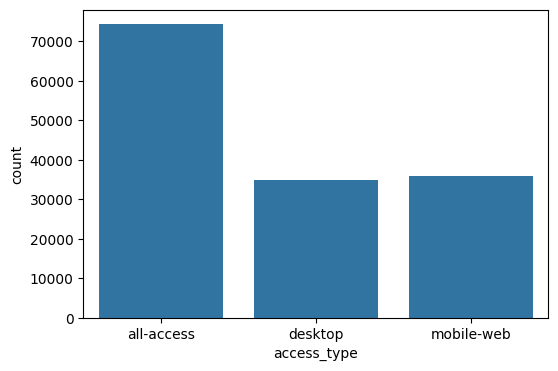

In [43]:
plt.figure(figsize=(6,4))
sns.countplot(x=df1['access_type'])
plt.show()

In [44]:
df1.head()

Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN         NaN   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-09  ...  2016-12-28  2016-12-29  2016-12-30  2016-12-31  \
0        26.0  ...        22.0        19.0        18.0        20.0   
1        10.0  ...        52.0        45.0        26.0        20.0   
2         4.0  ...         6.0         3.0         4.0        17.0   
3        11.0  ...        17.0        19.0        10.0        11.0   
4         NaN  ...        27.0        13.0        36.0        10.0   

                                               Npage    check  \
0       [2NE1, zh.wikipedia.org, all-access, spider]     2NE1   
1        [2PM, zh.wikipedia.org, all-access, spider]      2PM   
2         [3C, zh.wikipedia.org, all-access, spider]       3C   
3    inute, zh.wikipedia.org, all-access, spider]  4minute   
4  [52, Hz, I, Love, You, zh.wikipedia.org, all-a...       52   

                org  language  Origin  access_type  
0  zh.wikipedia.org   Chinese  spider   all-access  
1  zh.wikipedia.org   Chinese  spider   all-access  
2  zh.wikipedia.org   Chinese  spider   all-access  
3  zh.wikipedia.org   Chinese  spider   all-access  
4  zh.wikipedia.org   Chinese  spider   all-access  

[5 rows x 557 columns]

In [45]:
df2= df1.copy()

In [46]:
df2.drop(columns=['Page','Npage', 'check','Origin','access_type','org'], inplace=True)

In [47]:
df2.groupby('language').mean()

2015-07-01   2015-07-02   2015-07-03   2015-07-04  \
language                                                               
Chinese            306.174324   306.180041   304.711372   307.106882   
English           4120.242704  4096.969675  3863.318780  4020.385549   
French             526.624206   530.038727   509.429958   544.347518   
German             801.433519   790.469330   758.689914   697.106317   
Japenese           637.635044   732.300645   661.188706   830.489442   
Russian            694.492845   706.667866   654.068973   615.880100   
Spanish           1176.993529  1125.926357  1035.044477   972.426566   
Unknown_Language   120.165592   127.193583   119.130165   102.536659   

                   2015-07-05   2015-07-06   2015-07-07   2015-07-08  \
language                                                               
Chinese            326.373163   328.691651   328.067461   336.211756   
English           4157.757910  4462.850356  4262.741629  3990.764445   
French             534.101778   556.164492   537.884723   527.817815   
German             809.890360   890.095278   863.250528   876.393813   
Japenese           796.904439   694.056027   675.271477   671.186106   
Russian            655.269262   704.845619   688.638560   684.361397   
Spanish           1056.349179  1204.096016  1174.570371  1139.170006   
Unknown_Language   114.300295   130.303725   137.659899   141.776603   

                   2015-07-09   2015-07-10  ...   2016-12-22   2016-12-23  \
language                                    ...                             
Chinese            333.688679   347.026497  ...   349.670724   344.762638   
English           4068.850391  4043.516808  ...  5139.548413  4822.747469   
French             521.998012   492.682053  ...   655.391756   642.745017   
German             842.164878   785.139841  ...   837.680746   849.932492   
Japenese           653.866201   679.387027  ...   689.308646   987.190077   
Russian            701.551159   804.516772  ...   903.448739   890.293771   
Spanish           1117.413206  1015.597057  ...   988.274532   940.497283   
Unknown_Language   124.564926   126.691902  ...   148.778827   183.044889   

                   2016-12-24   2016-12-25   2016-12-26   2016-12-27  \
language                                                               
Chinese            365.425976   386.186927   381.047706   380.391169   
English           5024.351107  5306.654006  5934.564225  6189.329381   
French             621.216979   669.988652   940.795521   861.947656   
German             818.880085  1295.618572  1220.161841  1095.848843   
Japenese           874.321677   834.758562   794.316018   804.676399   
Russian            880.192547  1127.369418  1119.923293  1008.121724   
Spanish            885.848795   909.396495  1201.202043  1138.872438   
Unknown_Language   156.519798   184.039298   189.221193   166.680211   

                   2016-12-28   2016-12-29   2016-12-30   2016-12-31  
language                                                              
Chinese            382.556091   354.776010   358.554506   369.829429  
English           6032.638712  6425.295920  5353.679346  5180.347343  
French             777.255710   755.727032   703.626382   648.626656  
German            1042.817652  1004.514348   958.359915   900.882241  
Japenese           806.809621   883.427658   970.883847  1222.550930  
Russian            938.610821   903.053531   808.817615   886.737728  
Spanish           1184.690560  1117.971921   825.957059   791.449882  
Unknown_Language   211.060804   167.100070   184.586077   164.086632  

[8 rows x 550 columns]

In [48]:
aggregated_data = df2.groupby("language").mean().T.drop("Unknown_Language",axis = 1).reset_index()
aggregated_data["index"] = pd.to_datetime(aggregated_data["index"])
aggregated_data = aggregated_data.set_index("index")
aggregated_data


language       Chinese      English      French       German     Japenese  \
index                                                                       
2015-07-01  306.174324  4120.242704  526.624206   801.433519   637.635044   
2015-07-02  306.180041  4096.969675  530.038727   790.469330   732.300645   
2015-07-03  304.711372  3863.318780  509.429958   758.689914   661.188706   
2015-07-04  307.106882  4020.385549  544.347518   697.106317   830.489442   
2015-07-05  326.373163  4157.757910  534.101778   809.890360   796.904439   
...                ...          ...         ...          ...          ...   
2016-12-27  380.391169  6189.329381  861.947656  1095.848843   804.676399   
2016-12-28  382.556091  6032.638712  777.255710  1042.817652   806.809621   
2016-12-29  354.776010  6425.295920  755.727032  1004.514348   883.427658   
2016-12-30  358.554506  5353.679346  703.626382   958.359915   970.883847   
2016-12-31  369.829429  5180.347343  648.626656   900.882241  1222.550930   

language        Russian      Spanish  
index                                 
2015-07-01   694.492845  1176.993529  
2015-07-02   706.667866  1125.926357  
2015-07-03   654.068973  1035.044477  
2015-07-04   615.880100   972.426566  
2015-07-05   655.269262  1056.349179  
...                 ...          ...  
2016-12-27  1008.121724  1138.872438  
2016-12-28   938.610821  1184.690560  
2016-12-29   903.053531  1117.971921  
2016-12-30   808.817615   825.957059  
2016-12-31   886.737728   791.449882  

[550 rows x 7 columns]

In [49]:
aggregated_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 550 entries, 2015-07-01 to 2016-12-31
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Chinese   550 non-null    float64
 1   English   550 non-null    float64
 2   French    550 non-null    float64
 3   German    550 non-null    float64
 4   Japenese  550 non-null    float64
 5   Russian   550 non-null    float64
 6   Spanish   550 non-null    float64
dtypes: float64(7)
memory usage: 34.4 KB


# **Visualising Time Series for each languages:**

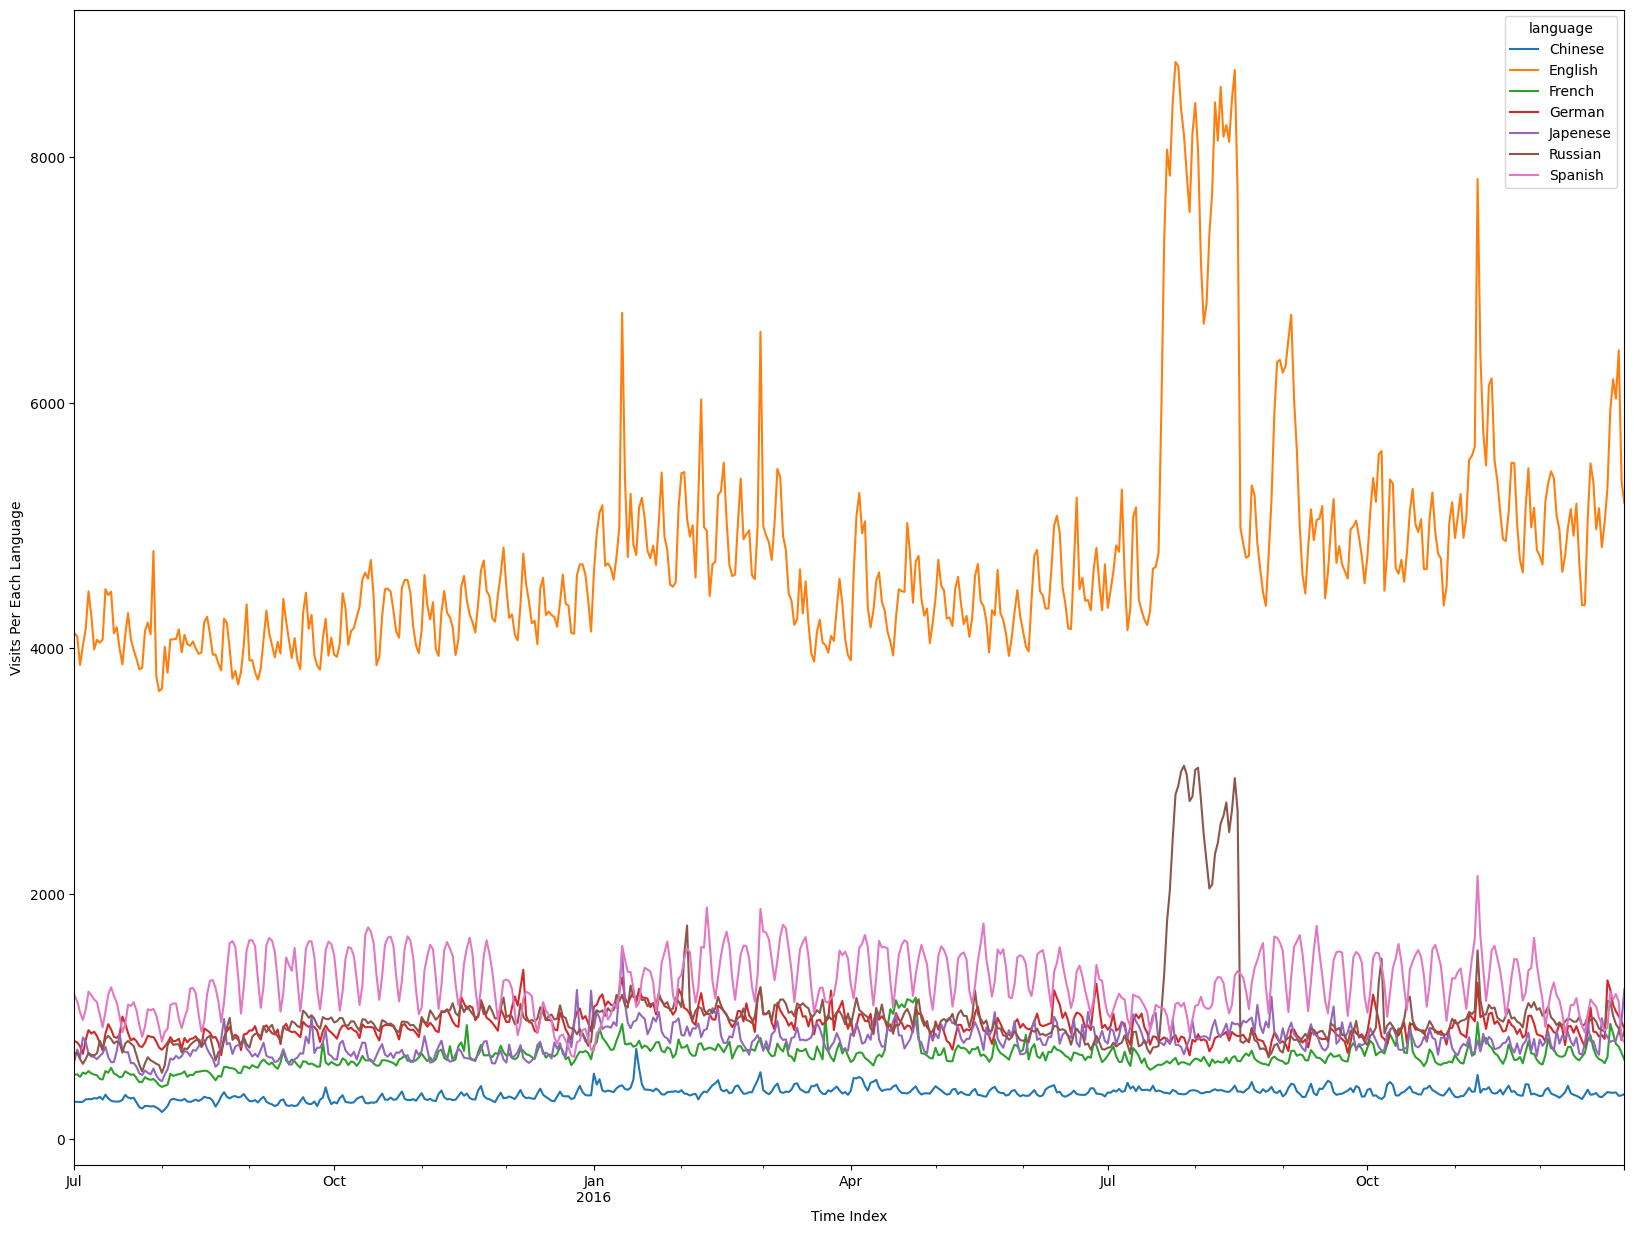

In [50]:
plt.rcParams['figure.figsize'] = (20, 15)
aggregated_data.plot()
plt.xlabel("Time Index")
plt.ylabel("Visits Per Each Language")
plt.show()


As per plot, english language is most visited language w.r.t time index. In month of July to September it is in peak.

Next Reussian language is also have peak in july to september.


Cheaking Missing values using plot

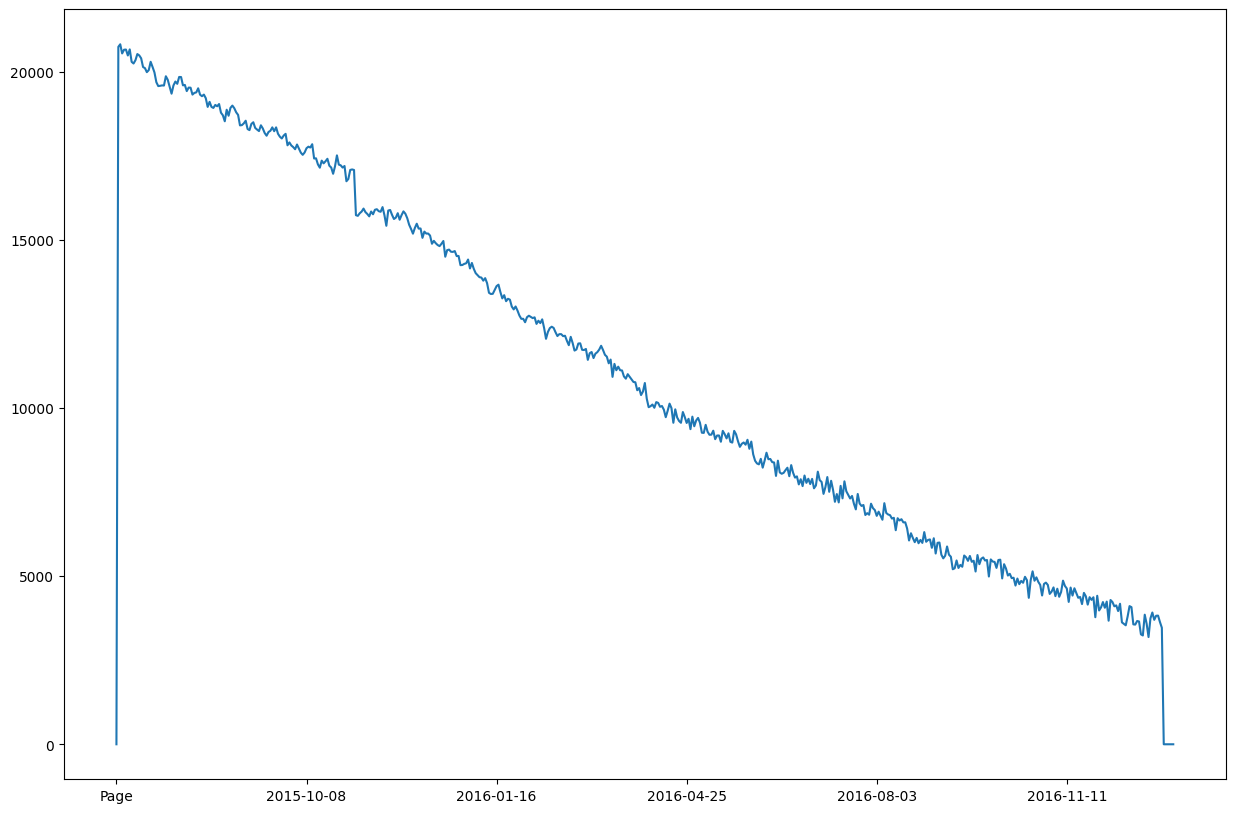

In [51]:
plt.figure(figsize=(15,10))
df1.isna().sum().plot()
plt.show()

* From above plot , we can observe that with time , null values are decreasing.
* Recent dates have lesser null values
* That means newer pages will have no data of prior to that page hosting date.



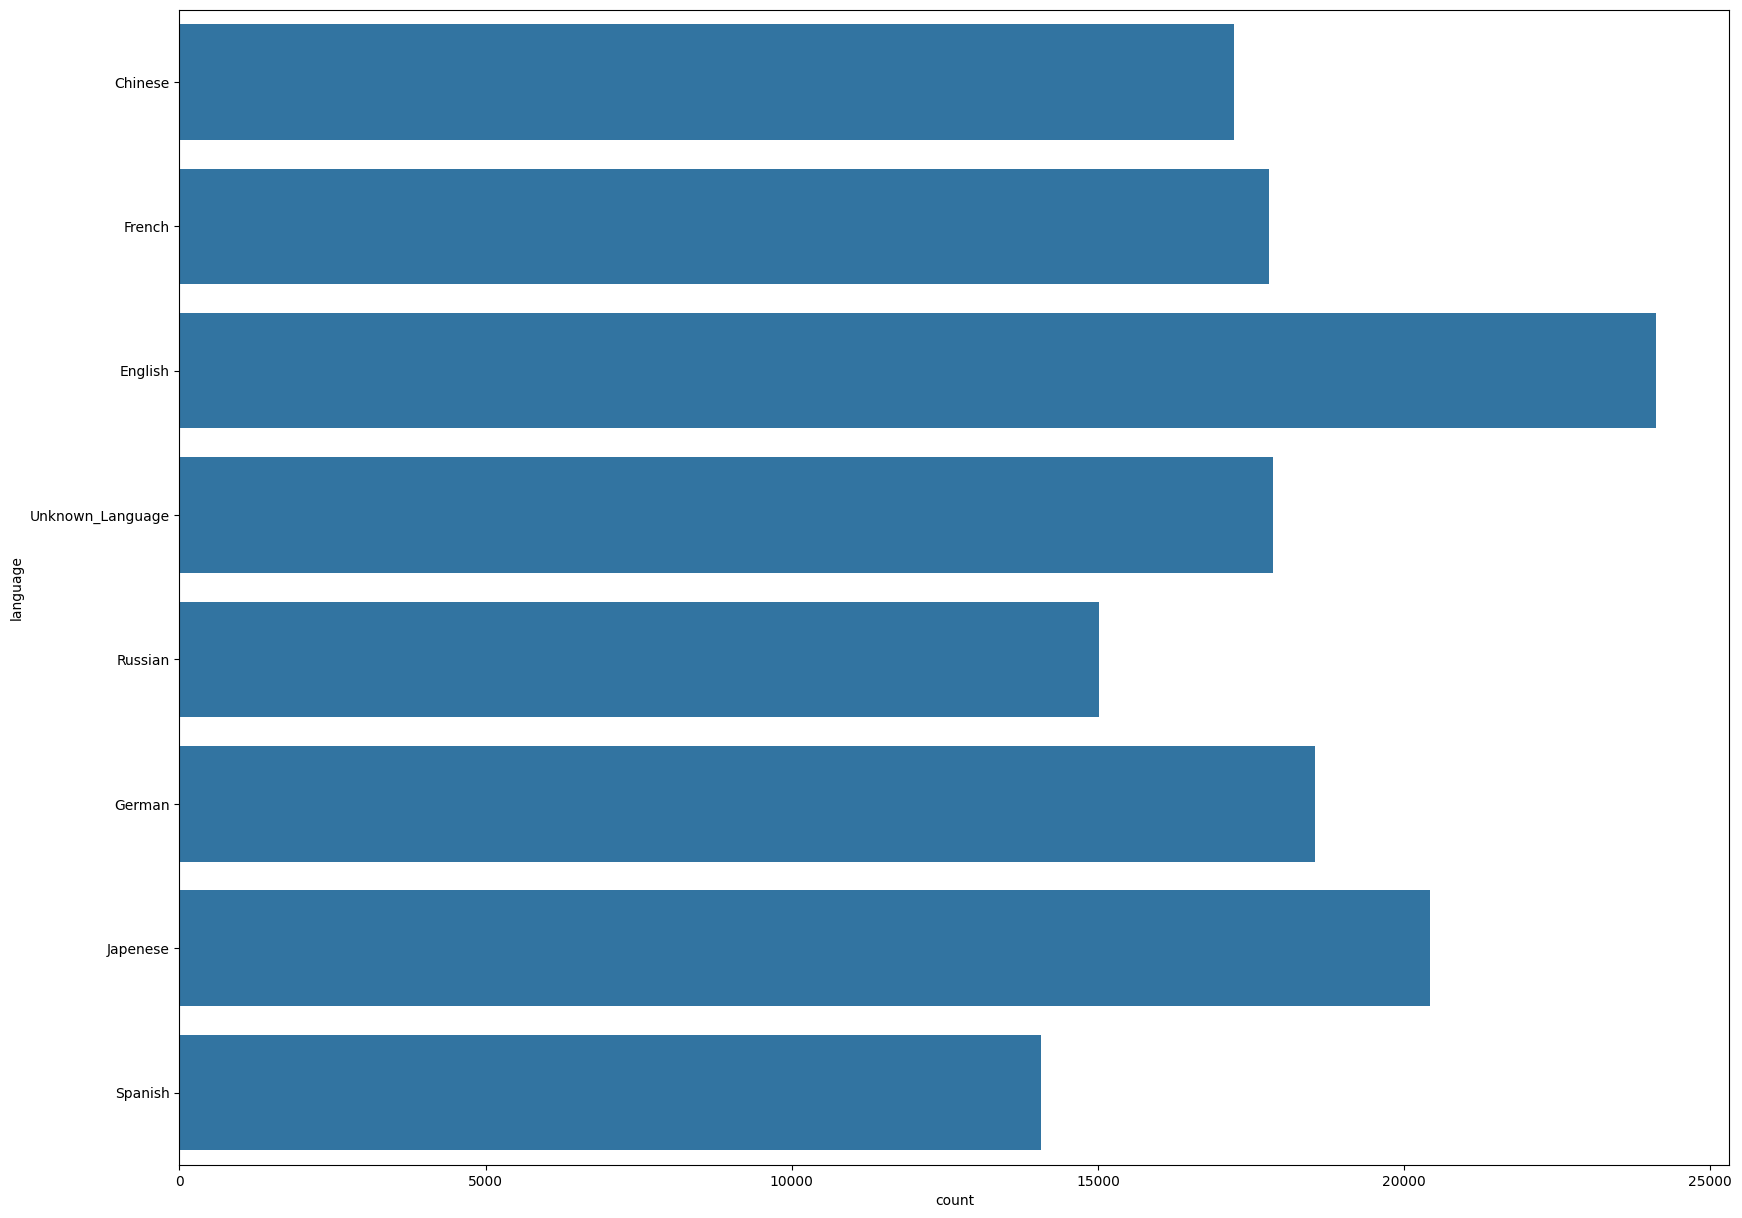

In [52]:
sns.countplot(df1['language'])
plt.show()

In [53]:
df1['language'].value_counts(normalize= True)*100

language
English             16.618986
Japenese            14.084225
German              12.785479
Unknown_Language    12.308445
French              12.271909
Chinese             11.876909
Russian             10.355501
Spanish              9.698545
Name: proportion, dtype: float64

English is coming 16.61% time, which is more than any other language followed by Japenese

Unknown language is coming 12.30%

In [54]:
# Filter the DataFrame for English language
english_df = df1[df1['language'] == 'English']


In [55]:
english_df.drop(columns=['Page','Npage', 'check','Origin','org','language','access_type'], inplace=True)

In [56]:
english_df.head()

2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
8357         3.0         4.0         7.0         4.0         4.0         2.0   
8358         NaN         NaN         NaN         NaN         NaN         NaN   
8359         NaN         NaN         NaN         NaN         NaN         NaN   
8360      2403.0     20136.0      1850.0      1432.0      1351.0      1792.0   
8361       982.0       881.0       794.0       979.0      1191.0      1057.0   

      2015-07-07  2015-07-08  2015-07-09  2015-07-10  ...  2016-12-22  \
8357         3.0         7.0         2.0         NaN  ...         3.0   
8358         NaN         NaN         NaN         NaN  ...      2898.0   
8359         NaN         NaN         1.0         0.0  ...         1.0   
8360      1710.0      2039.0      1957.0      1640.0  ...      1401.0   
8361      1184.0       860.0      1259.0      1257.0  ...       404.0   

      2016-12-23  2016-12-24  2016-12-25  2016-12-26  2016-12-27  2016-12-28  \
8357         1.0         6.0         3.0         1.0         1.0         3.0   
8358      2676.0      2032.0      2294.0      2074.0      2175.0      2156.0   
8359         NaN         NaN         NaN         NaN         NaN         NaN   
8360      1238.0       976.0       810.0       989.0      1332.0      1243.0   
8361       344.0       225.0       229.0       335.0       313.0       379.0   

      2016-12-29  2016-12-30  2016-12-31  
8357         3.0         1.0         0.0  
8358      2302.0      2098.0      1770.0  
8359         NaN         1.0         2.0  
8360      1681.0      1303.0      1098.0  
8361       393.0       354.0       272.0  

[5 rows x 550 columns]

In [57]:
english_df.shape

(24108, 550)

In [58]:
# Imputation with mean value
#english_df.iloc[1, :].T.fillna(english_df.iloc[1, :].T.mean()).plot(label='imputed')
#english_df.iloc[1, :].T.plot(label='original')
#plt.legend()

Imputation using the mean is not feasible because it will give sharpe increase or decrese in value.

In [59]:
# Let us fill na values for each row by using linear interpolation method

for i in range(len(english_df)):
 english_df.iloc[i, :].T.interpolate(method='linear', inplace=True)


In [60]:
english_df

2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  \
8357           3.0         4.0         7.0         4.0         4.0   
8358           NaN         NaN         NaN         NaN         NaN   
8359           NaN         NaN         NaN         NaN         NaN   
8360        2403.0     20136.0      1850.0      1432.0      1351.0   
8361         982.0       881.0       794.0       979.0      1191.0   
...            ...         ...         ...         ...         ...   
113946         1.0         5.0         2.0         2.0         1.5   
113947         7.0         9.0         3.0         6.0         4.0   
113948        10.0         6.0         4.0         8.0        13.0   
113949         NaN         NaN         1.0         1.0         1.0   
113950         8.0         5.0         7.0        13.0         8.0   

        2015-07-06   2015-07-07   2015-07-08   2015-07-09  2015-07-10  ...  \
8357           2.0     3.000000     7.000000     2.000000         2.5  ...   
8358           NaN          NaN          NaN          NaN         NaN  ...   
8359           NaN          NaN          NaN     1.000000         0.0  ...   
8360        1792.0  1710.000000  2039.000000  1957.000000      1640.0  ...   
8361        1057.0  1184.000000   860.000000  1259.000000      1257.0  ...   
...            ...          ...          ...          ...         ...  ...   
113946         1.0     1.333333     1.666667     2.000000         1.0  ...   
113947         2.0     6.000000     7.000000     6.000000         7.0  ...   
113948         5.0     9.000000     5.000000     4.000000         7.0  ...   
113949         1.0     1.000000     1.666667     2.333333         3.0  ...   
113950        13.0     9.000000     7.000000     8.000000         8.0  ...   

        2016-12-22  2016-12-23  2016-12-24  2016-12-25   2016-12-26  \
8357           3.0         1.0         6.0         3.0     1.000000   
8358        2898.0      2676.0      2032.0      2294.0  2074.000000   
8359           1.0         1.0         1.0         1.0     1.000000   
8360        1401.0      1238.0       976.0       810.0   989.000000   
8361         404.0       344.0       225.0       229.0   335.000000   
...            ...         ...         ...         ...          ...   
113946         1.0         1.5         2.0         2.0     1.666667   
113947         3.0         3.0         5.0         4.0     6.000000   
113948         8.0         6.0         7.0         2.0     8.000000   
113949         1.0         7.0         4.0         5.0     2.000000   
113950         4.0         1.0         6.0         5.0     2.000000   

         2016-12-27  2016-12-28   2016-12-29   2016-12-30  2016-12-31  
8357       1.000000         3.0     3.000000     1.000000         0.0  
8358    2175.000000      2156.0  2302.000000  2098.000000      1770.0  
8359       1.000000         1.0     1.000000     1.000000         2.0  
8360    1332.000000      1243.0  1681.000000  1303.000000      1098.0  
8361     313.000000       379.0   393.000000   354.000000       272.0  
...             ...         ...          ...          ...         ...  
113946     1.333333         1.0     1.333333     1.666667         2.0  
113947     6.500000         7.0     4.000000     5.000000         7.0  
113948     1.000000         5.0     7.000000    10.000000         3.0  
113949     7.000000         3.0     6.000000     4.000000         4.0  
113950    14.000000         9.0    15.000000    16.000000         7.0  

[24108 rows x 550 columns]

In [61]:
#we can try for Knn imputation
from sklearn.impute import KNNImputer
imp_mean = KNNImputer(n_neighbors=3)
imp_mean.fit(english_df)
# imp_mean.transform(english_df)


KNNImputer(n_neighbors=3)

In [62]:
col = english_df.columns
X = imp_mean.transform(english_df)

In [63]:
df_cl = pd.DataFrame(X, columns =col)
df_cl.head()


2015-07-01    2015-07-02  2015-07-03   2015-07-04   2015-07-05  \
0     3.000000      4.000000         7.0     4.000000     4.000000   
1  2268.666667   2296.666667      1902.0  1837.333333  2000.333333   
2     2.000000      1.000000         1.0     1.000000     1.000000   
3  2403.000000  20136.000000      1850.0  1432.000000  1351.000000   
4   982.000000    881.000000       794.0   979.000000  1191.000000   

    2015-07-06  2015-07-07   2015-07-08  2015-07-09   2015-07-10  ...  \
0     2.000000         3.0     7.000000         2.0     2.500000  ...   
1  2738.666667      2797.0  2558.000000      2375.0  2355.333333  ...   
2     1.000000         1.0     1.333333         1.0     0.000000  ...   
3  1792.000000      1710.0  2039.000000      1957.0  1640.000000  ...   
4  1057.000000      1184.0   860.000000      1259.0  1257.000000  ...   

   2016-12-22  2016-12-23  2016-12-24  2016-12-25  2016-12-26  2016-12-27  \
0         3.0         1.0         6.0         3.0         1.0         1.0   
1      2898.0      2676.0      2032.0      2294.0      2074.0      2175.0   
2         1.0         1.0         1.0         1.0         1.0         1.0   
3      1401.0      1238.0       976.0       810.0       989.0      1332.0   
4       404.0       344.0       225.0       229.0       335.0       313.0   

   2016-12-28  2016-12-29  2016-12-30  2016-12-31  
0         3.0         3.0         1.0         0.0  
1      2156.0      2302.0      2098.0      1770.0  
2         1.0         1.0         1.0         2.0  
3      1243.0      1681.0      1303.0      1098.0  
4       379.0       393.0       354.0       272.0  

[5 rows x 550 columns]

In [64]:
dfmean = np.mean(df_cl, axis = 0)
# dfmean


In [65]:
dfmean.info()


<class 'pandas.core.series.Series'>
Index: 550 entries, 2015-07-01 to 2016-12-31
Series name: None
Non-Null Count  Dtype  
--------------  -----  
550 non-null    float64
dtypes: float64(1)
memory usage: 24.8+ KB


In [66]:
dfmean = pd.DataFrame(dfmean)
dfmean.reset_index(inplace= True)
dfmean.columns = ['Date', 'Clicks']
dfmean['Date'] = pd.to_datetime(dfmean['Date'])


In [67]:
dfmean.set_index('Date', inplace = True)


In [68]:
dfmean.head()

Clicks
Date                   
2015-07-01  3685.929102
2015-07-02  3666.183423
2015-07-03  3481.298706
2015-07-04  3621.009453
2015-07-05  3745.193185

[]

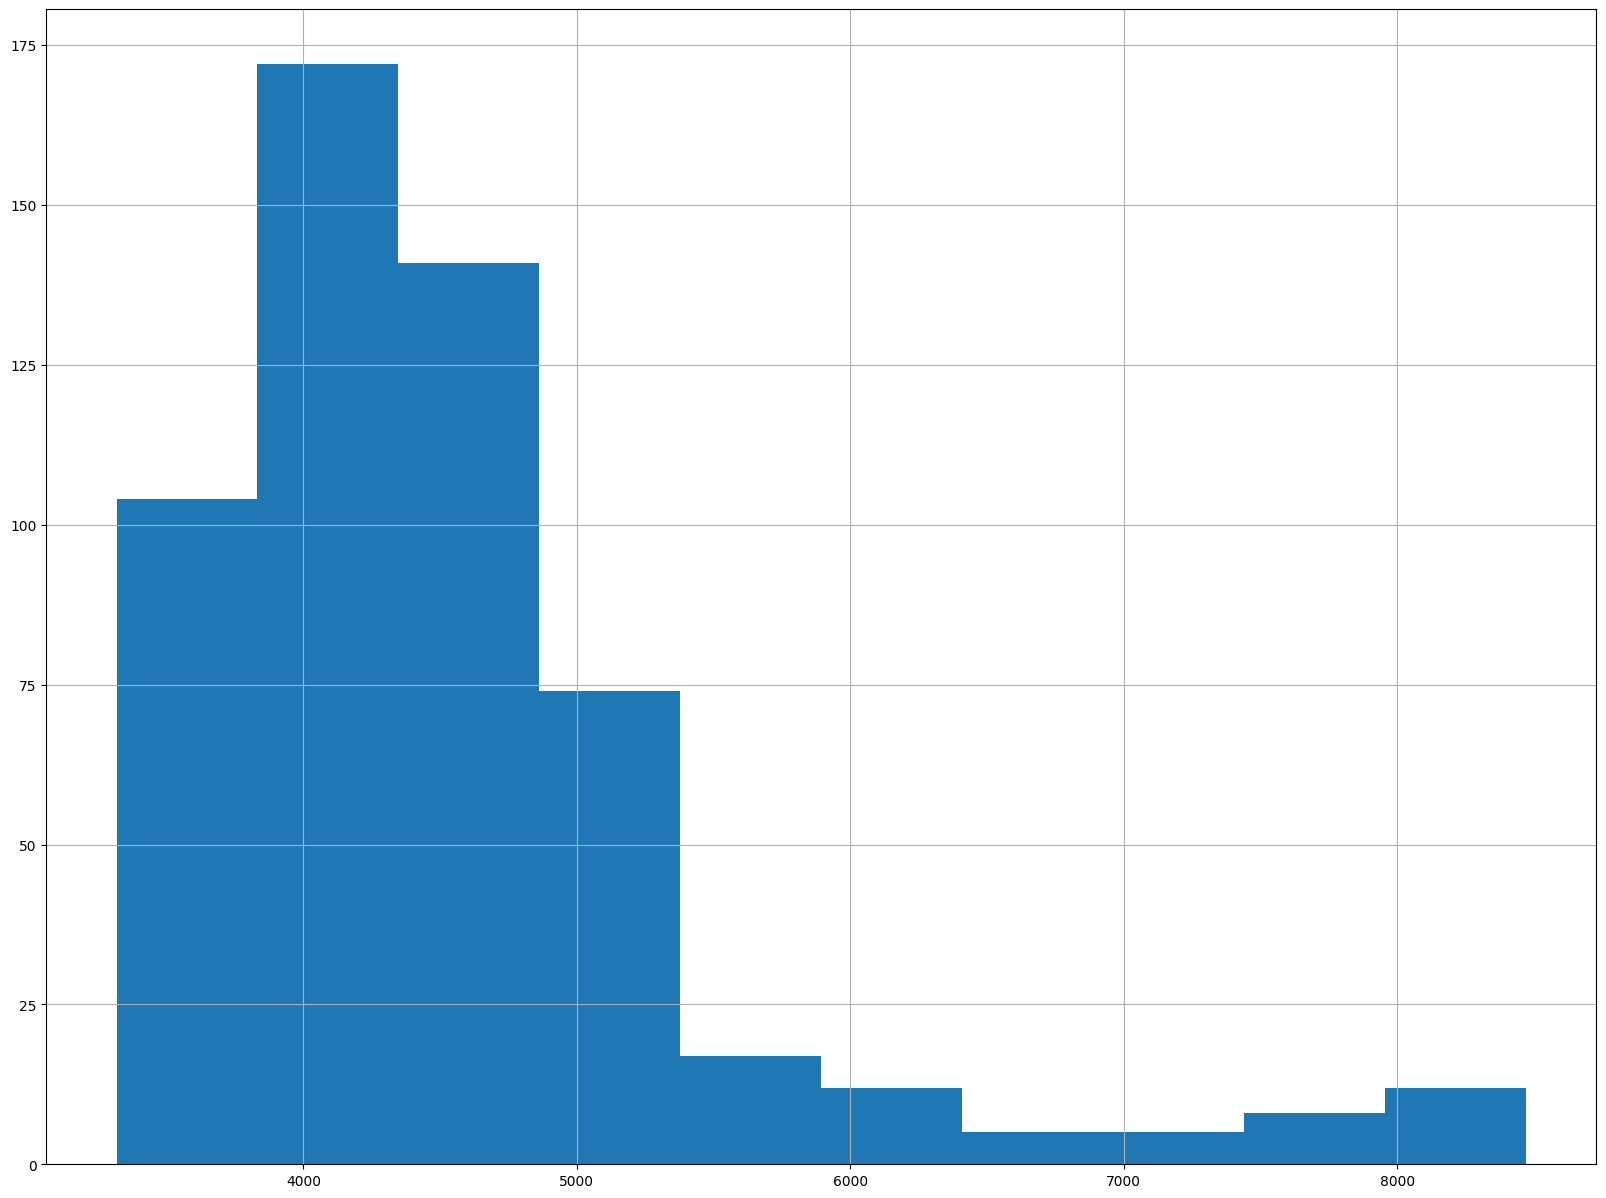

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
dfmean.Clicks.hist().plot()


In [70]:
dfmean.describe()


Clicks
count   550.000000
mean   4549.160695
std     949.323742
min    3317.101874
25%    3945.611852
50%    4346.738061
75%    4831.467203
max    8469.402479

From the above statics we can see there are some outlier present in the data

<Axes: xlabel='Date'>

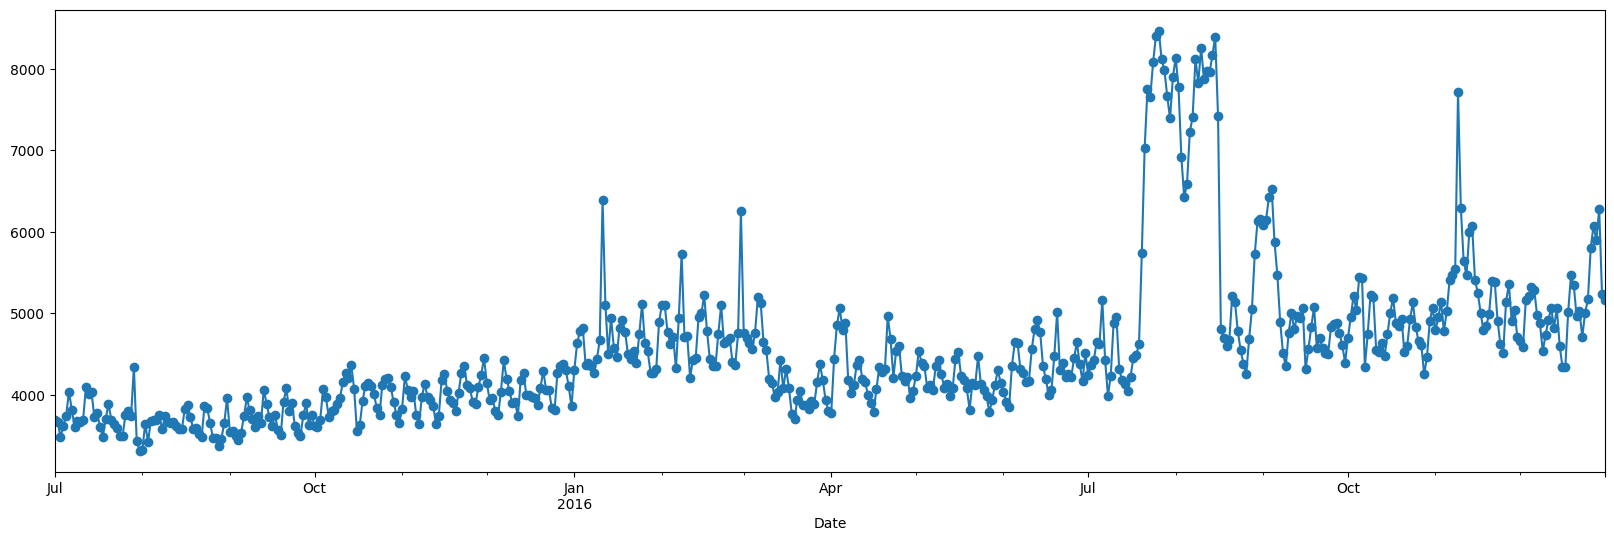

In [71]:
dfmean.Clicks.plot(style='-o', figsize=(20,6))


In [72]:
dfmean.Clicks.quantile(0.95)


6483.67015810626

This means that 95% of the values in our signal are less than 15,164.6, or that only 5% values are higher than this value.

Similarly, lets find the value for 5 percentile

In [73]:
dfmean.Clicks.quantile(0.05)

3584.9933667407395

This means that only 5% of the values in our signal are less than 7307.8, or that about 95% values are higher than this value.

Using these values, we can cap them as the maximum and the minimum values of our series, respectively.

<Axes: xlabel='Date'>

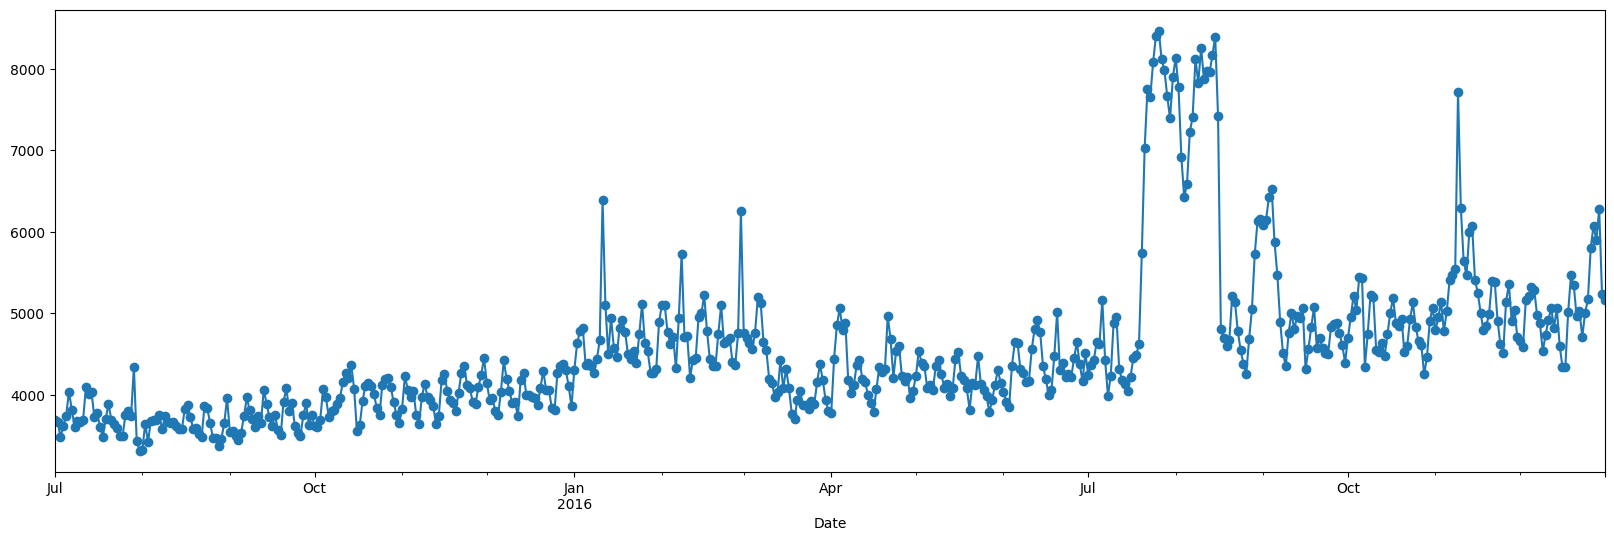

In [74]:
dfmean.Clicks.plot(style='-o', figsize=(20,6))

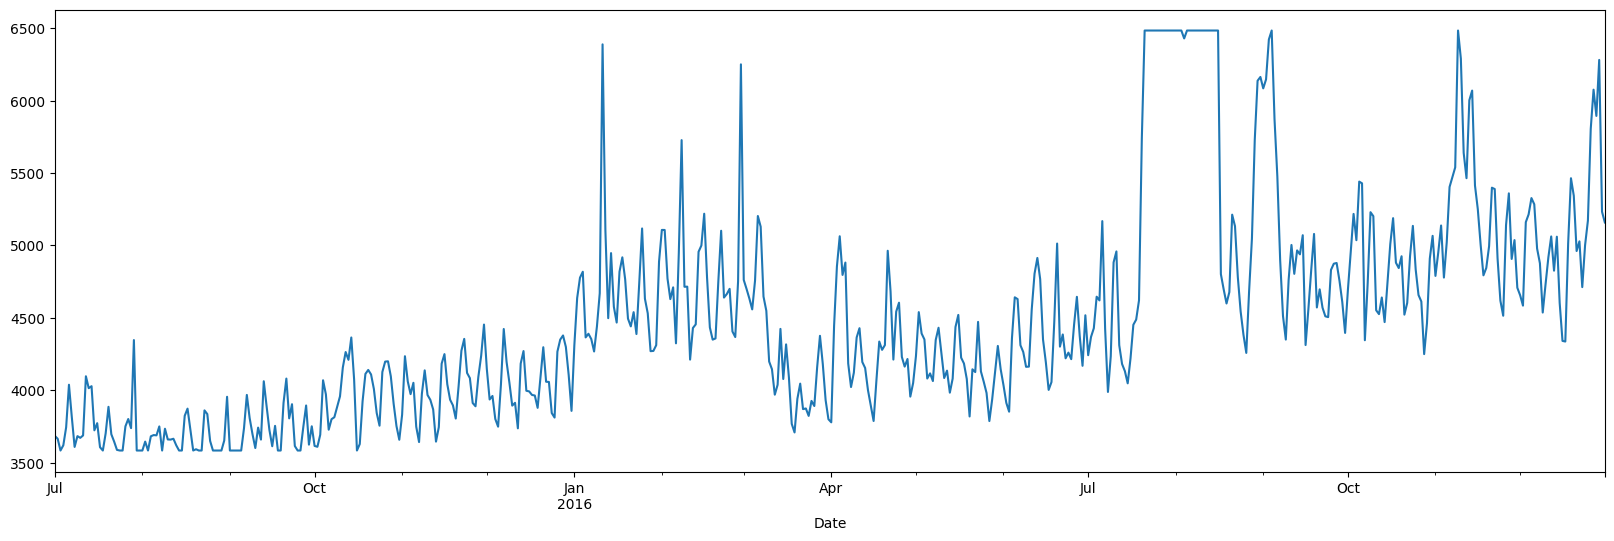

In [75]:
#After using clipping method
plt.figure(figsize=(20,6))
dfmean.Clicks.clip(upper=dfmean.Clicks.quantile(0.95), lower=dfmean.Clicks.quantile(0.05)).plot()
plt.show()


# **Check for Stationarity**

There is a statistical method called Dickey-Fuller test, designed for testing for stationarity.

It fits an auto regressive model, checks if it worked or not. If it did, then that means it was a stationary time series.

There is a complicated mechanism to it. We don't need to know how it works. Just need to be aware of this test, as it can be handy.


Q. How can we implement Dickey-Fuller Test?

We can find this as a built in function under statmodels library as sm.tsa.stattools.adfuller().


Q. How do we interpret the result of Dickey-Fuller test?

This test returns the pvalue.

In order for a time series to be stationary, the pvalue should be less than 0.05

Let's do the test for our timeseries

In [76]:
import statsmodels.api as sm
sm.tsa.stattools.adfuller(dfmean.Clicks)[1]

0.15801835424501193

The pvalue of the timeseries is very high, 0.15 approx.

So we can conclude that our time series is not stationary.


*   List item

*   List item
*   List item


*   List item


This makes sense because our time series has both, trend and seasonality.

In [77]:
model = sm.tsa.seasonal_decompose(dfmean.Clicks, model='additive')


<Figure size 1000x600 with 0 Axes>

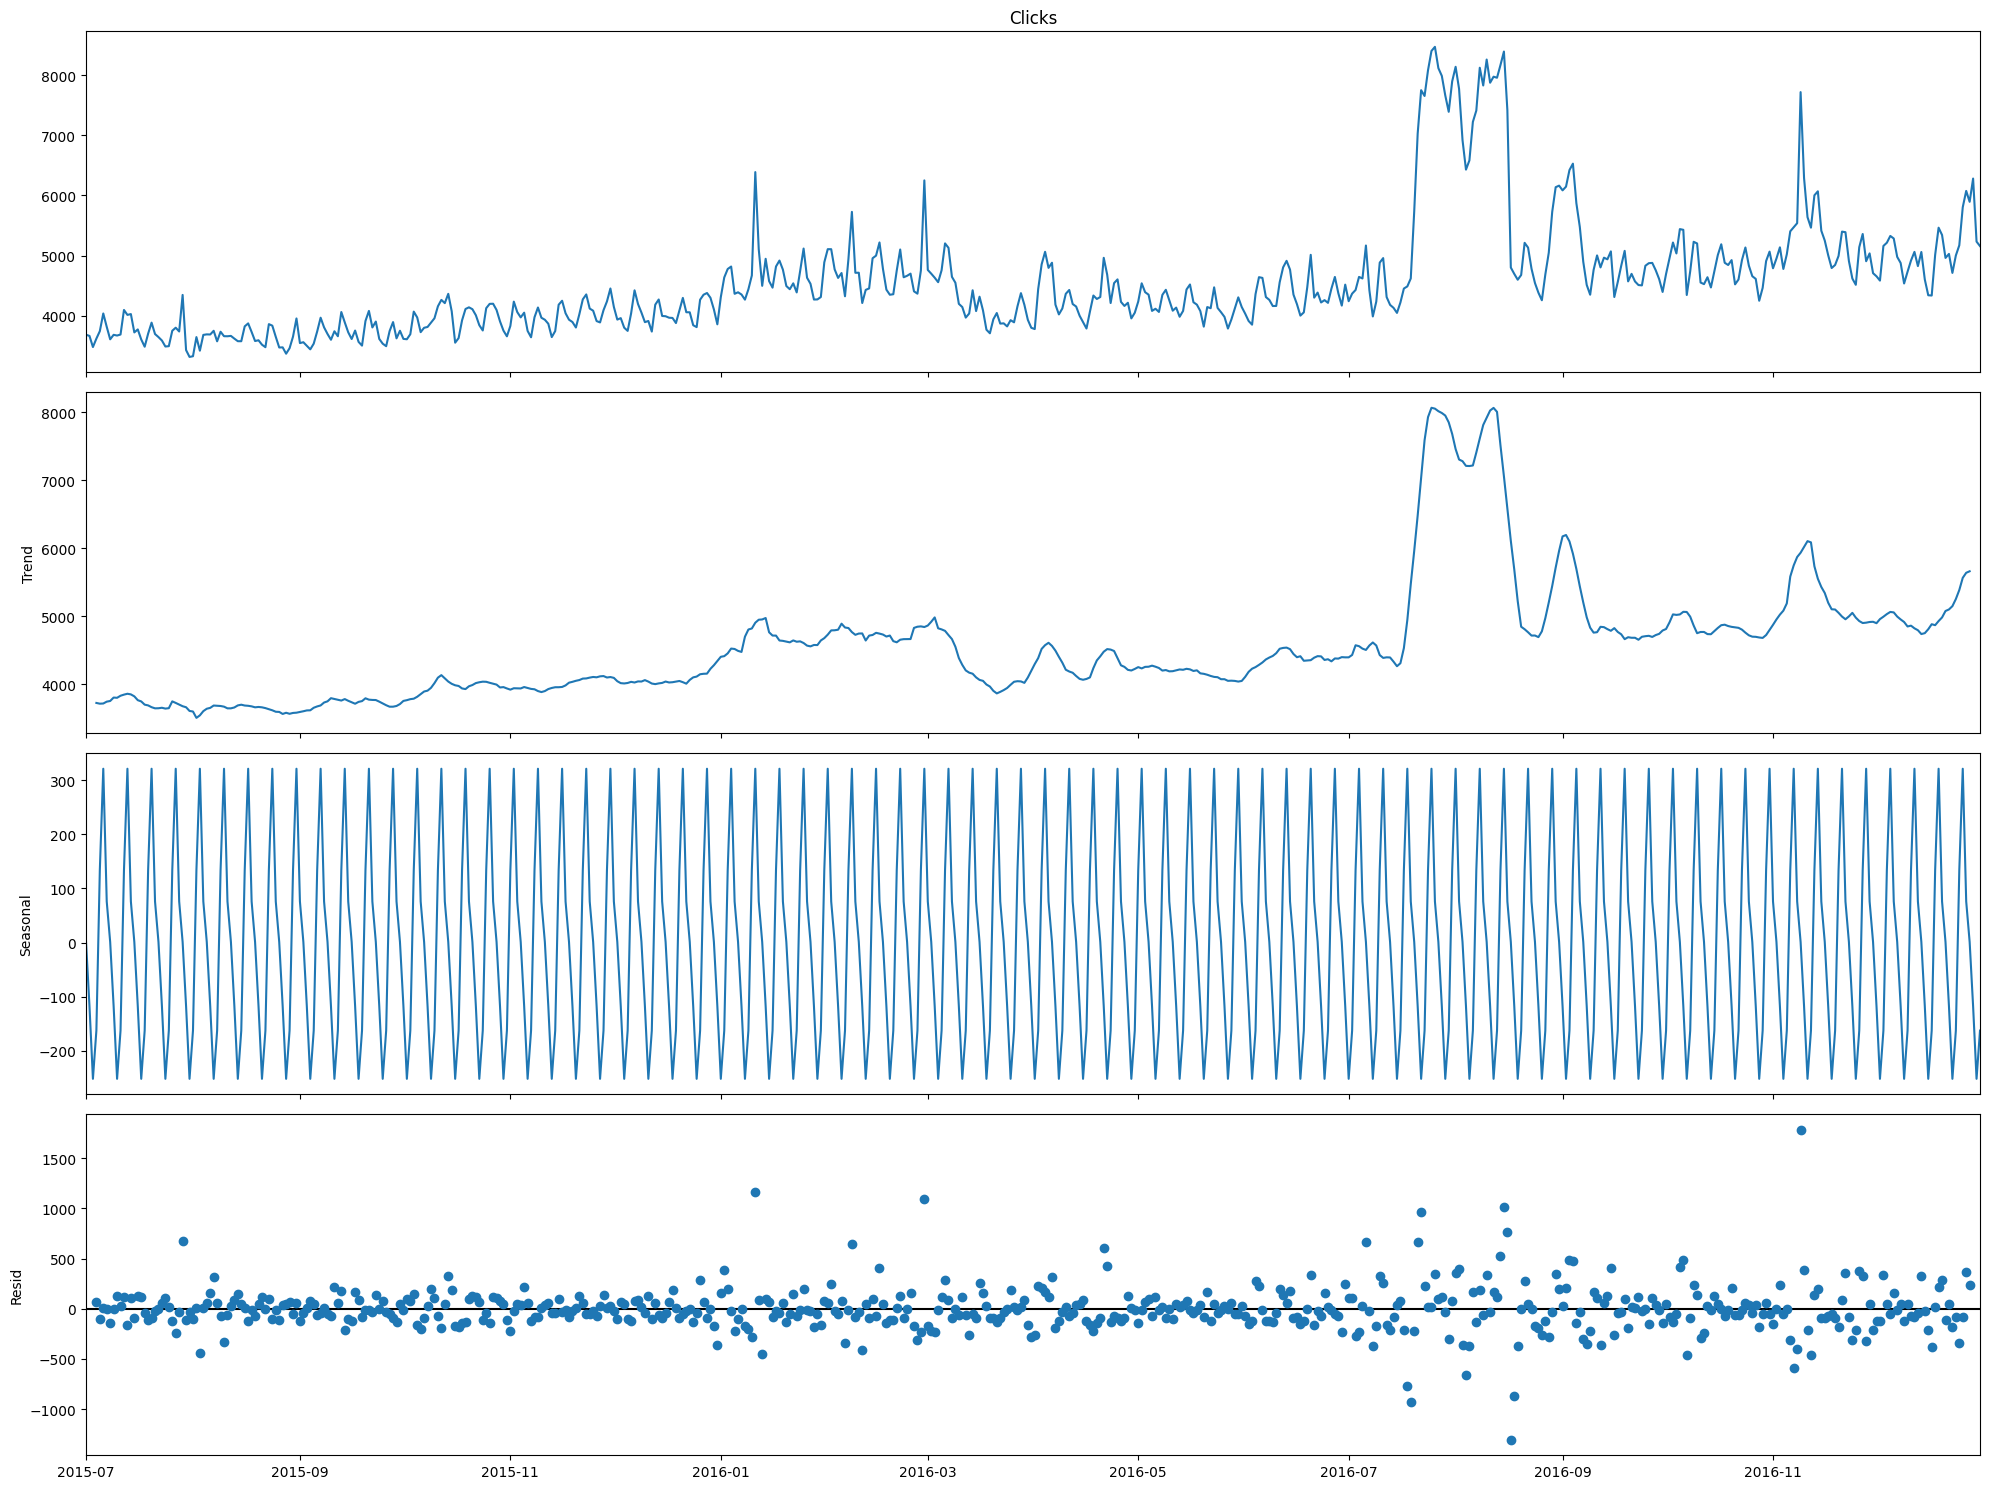

In [78]:
fig = plt.figure(figsize=(10,6))
model.plot(fig);


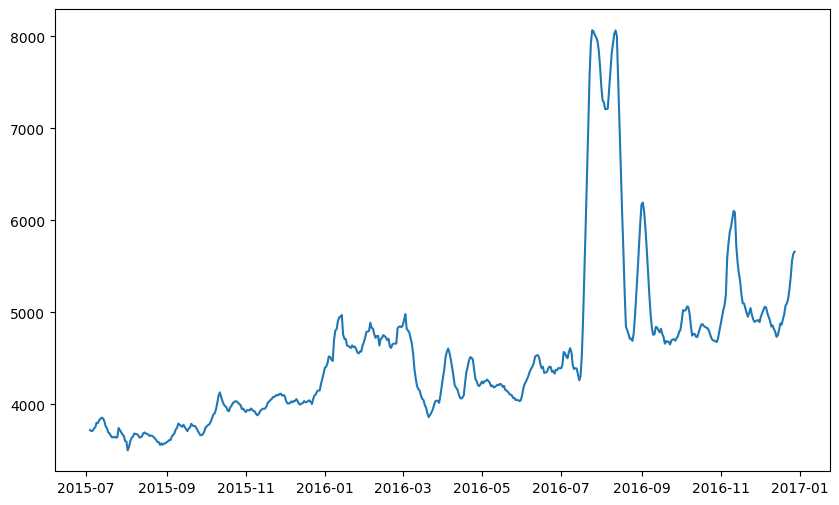

In [79]:
plt.figure(figsize=(10,6))
plt.plot(model.trend)
#Overall the trend looks linear but if looked in short term then the signal is quadratic

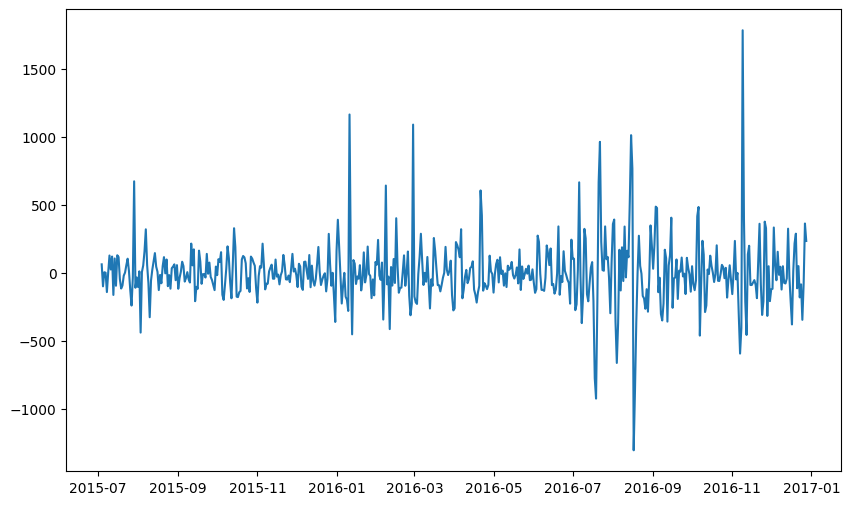

In [80]:
plt.figure(figsize=(10,6))
plt.plot(model.resid)


<Axes: >

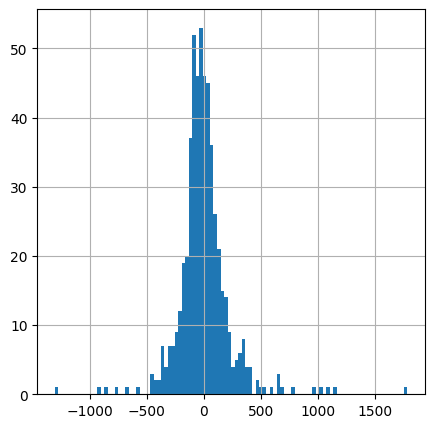

In [81]:
plt.figure(figsize=(5,5))
model.resid.hist(bins=100)


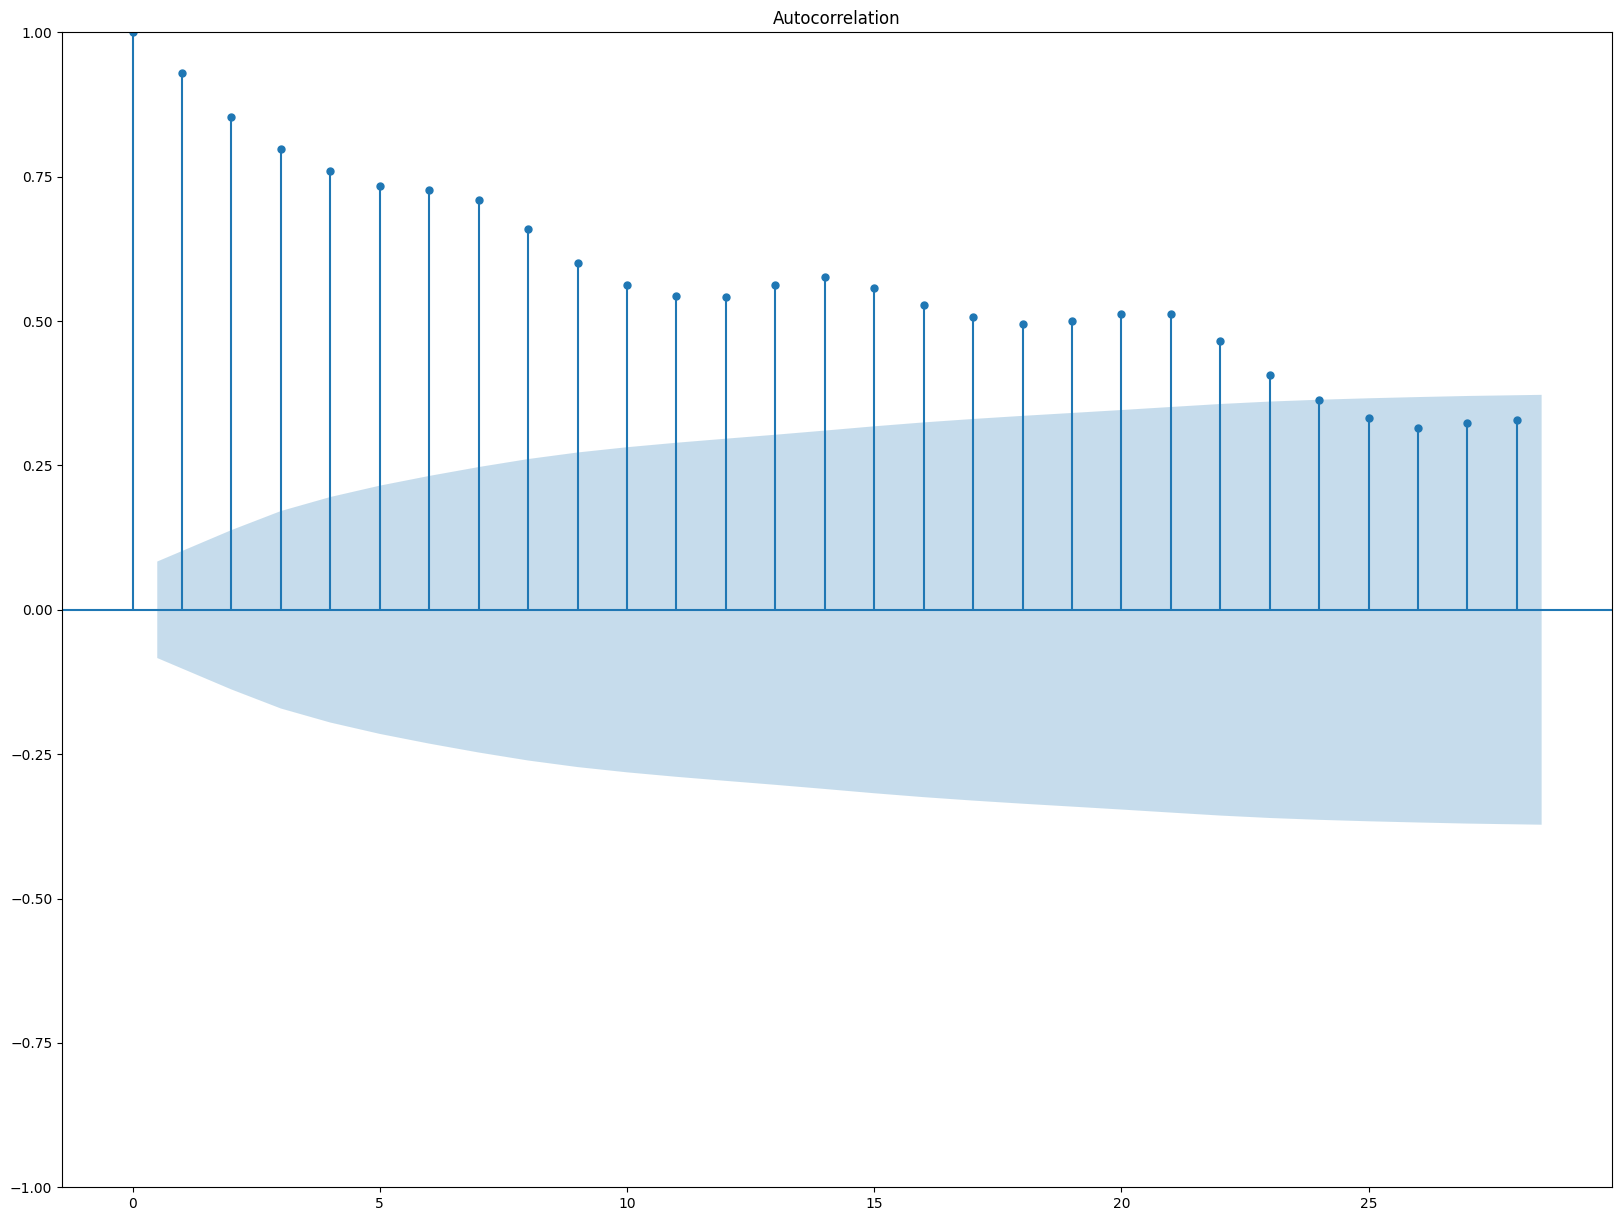

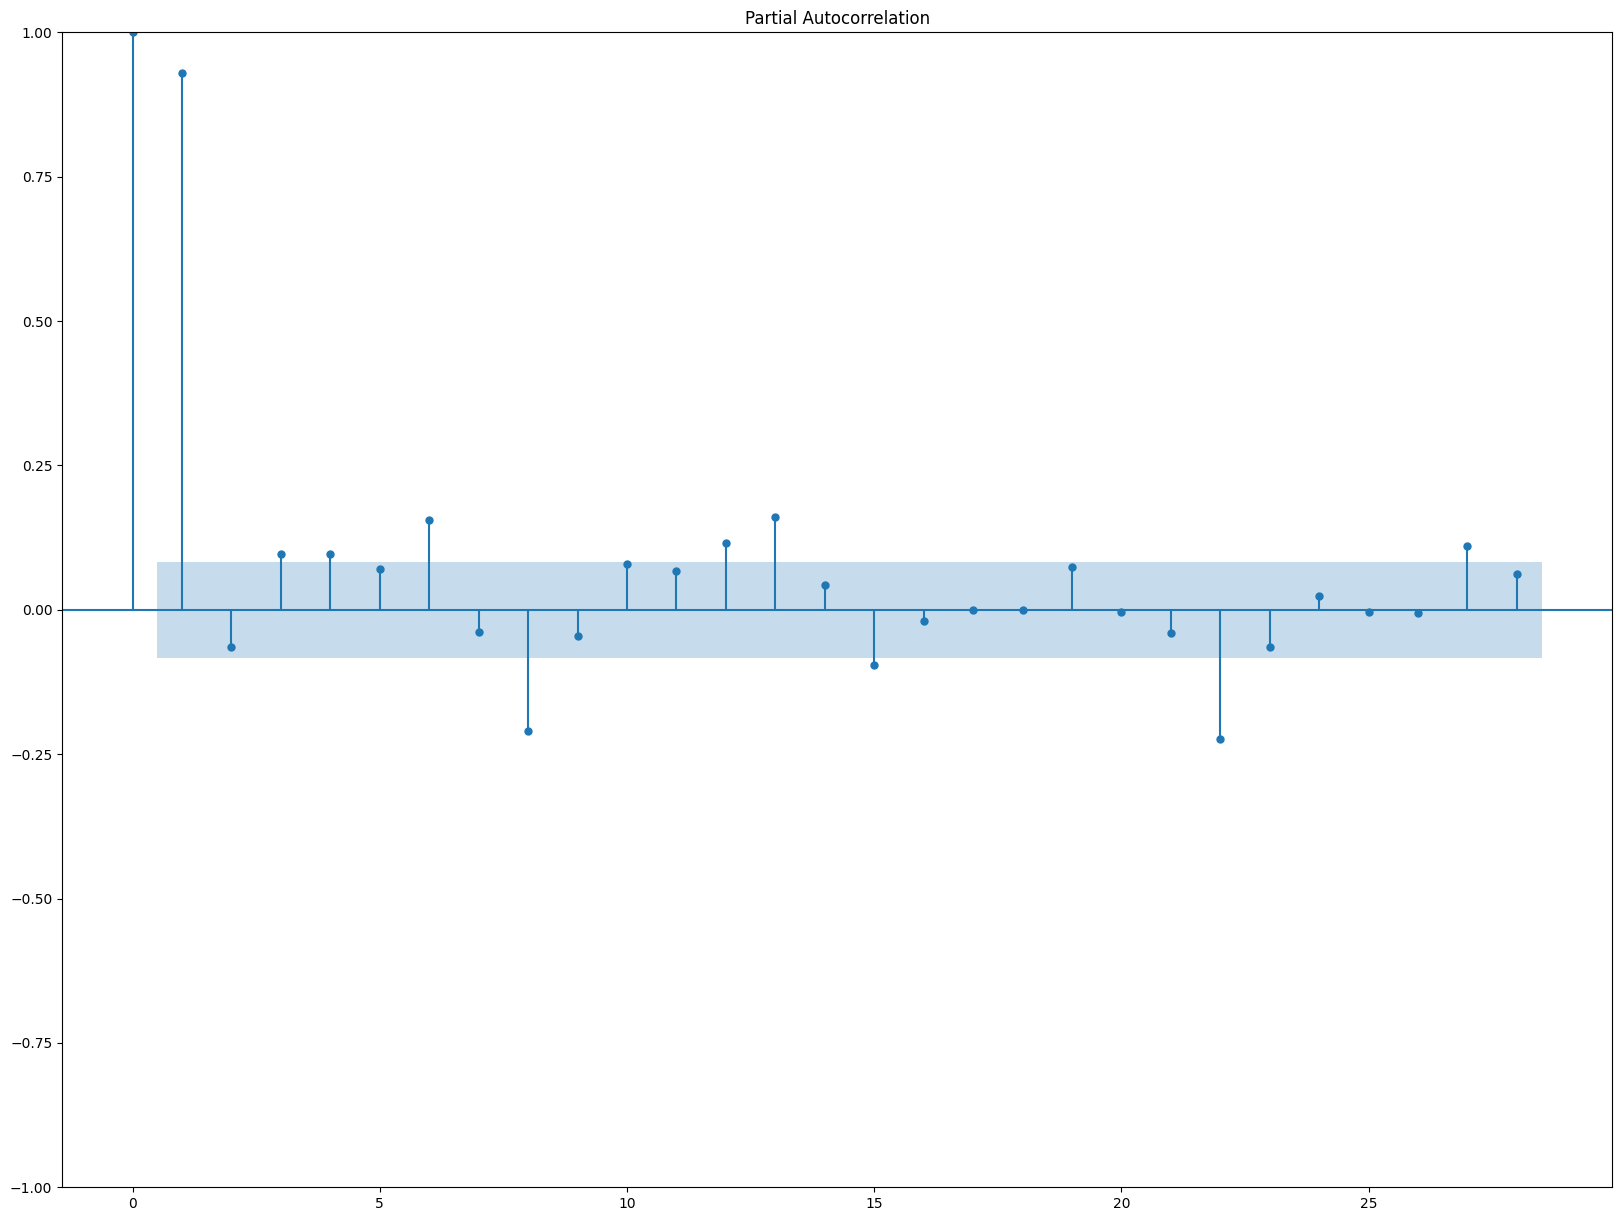

In [82]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

plot_acf(dfmean.Clicks);
plot_pacf(dfmean.Clicks);


In [83]:
ind = int(0.95 * len(dfmean))
train_x = dfmean.iloc[:ind, :]
test_x = dfmean.iloc[ind: , :]


In [84]:
from sklearn.metrics import (
 mean_squared_error as mse,
 mean_absolute_error as mae,
 mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
 print('MAE :', round(mae(actual, predicted), 3))
 print('RMSE :', round(mse(actual, predicted)**0.5, 3))
 print('MAPE:', round(mape(actual, predicted), 3))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


MAE : 349.873
RMSE : 463.419
MAPE: 0.068


<Figure size 800x2000 with 0 Axes>

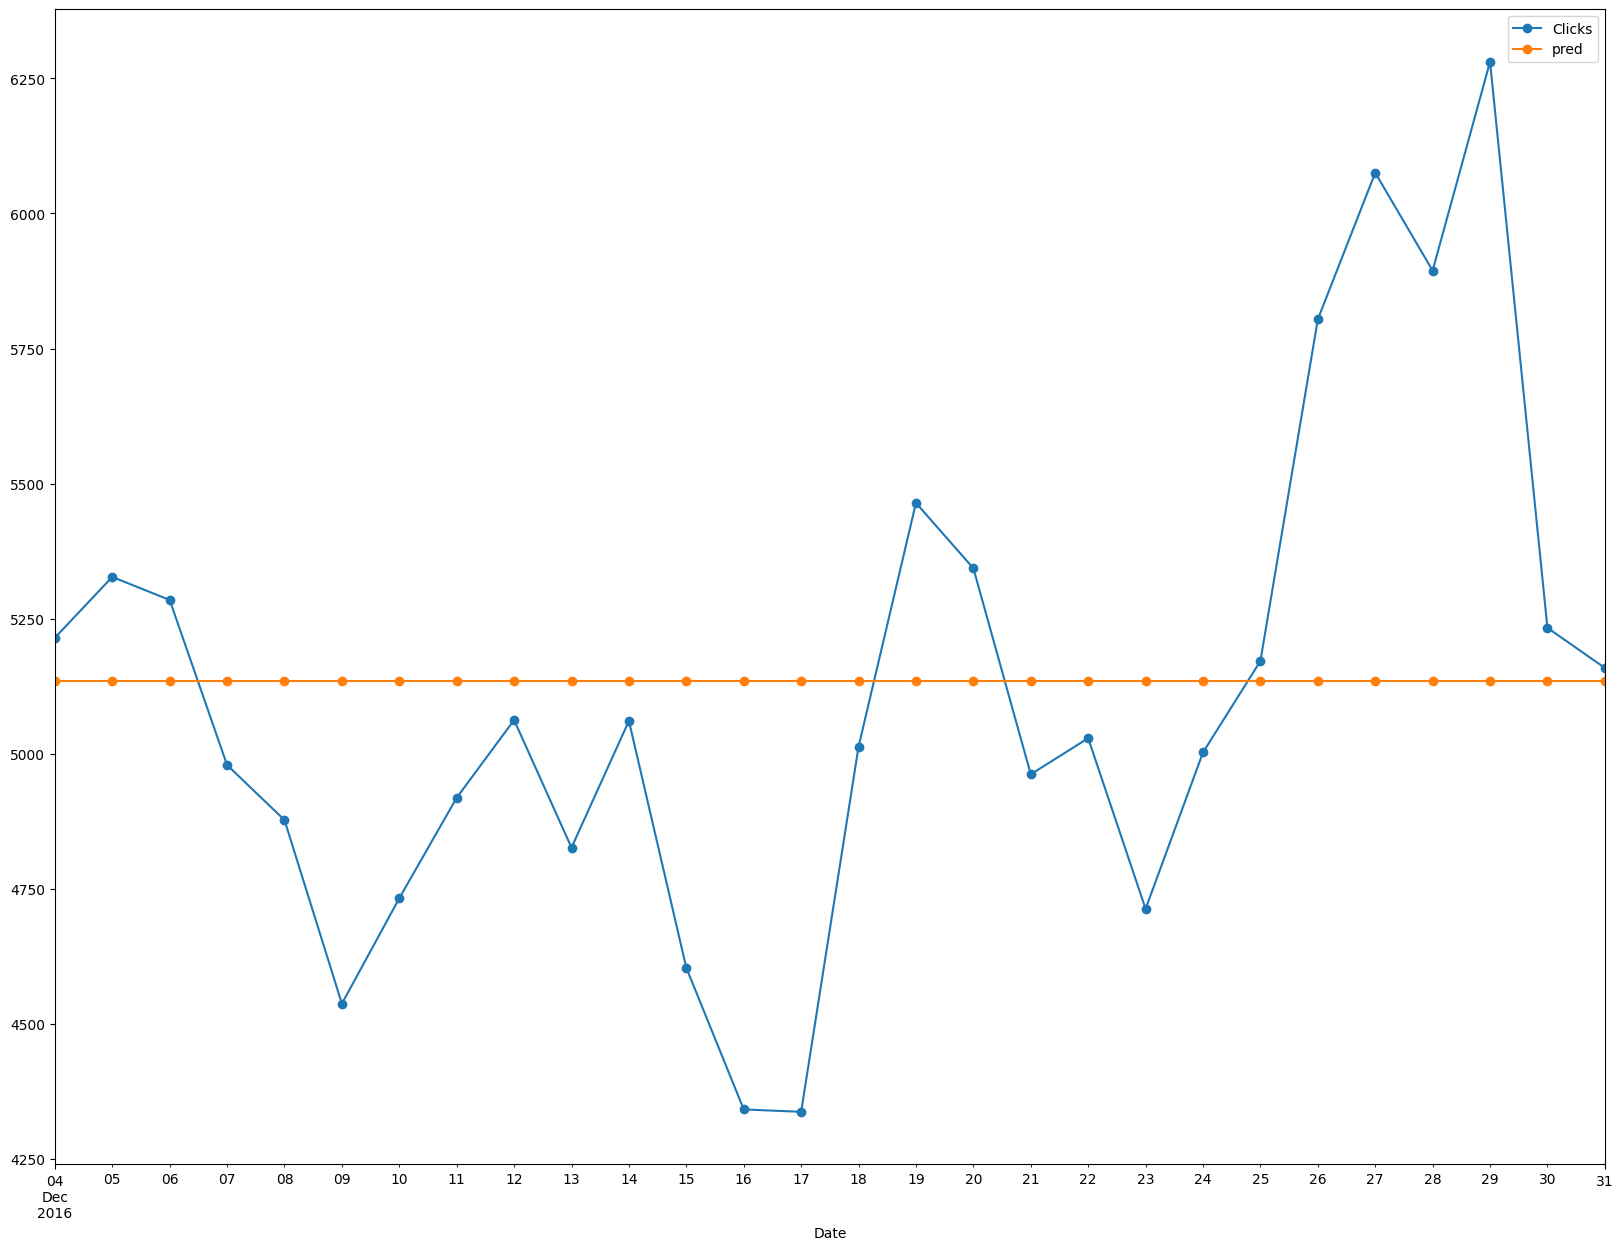

In [85]:
# Trying with SES model for prediction
import statsmodels.api as sm
model = sm.tsa.SimpleExpSmoothing(train_x.Clicks).fit(smoothing_level=1/(52))
test_x['pred'] = model.forecast(steps = len(test_x))
plt.figure(figsize=(8,20))
test_x.plot(style='-o')
performance(test_x['Clicks'], test_x['pred'])


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


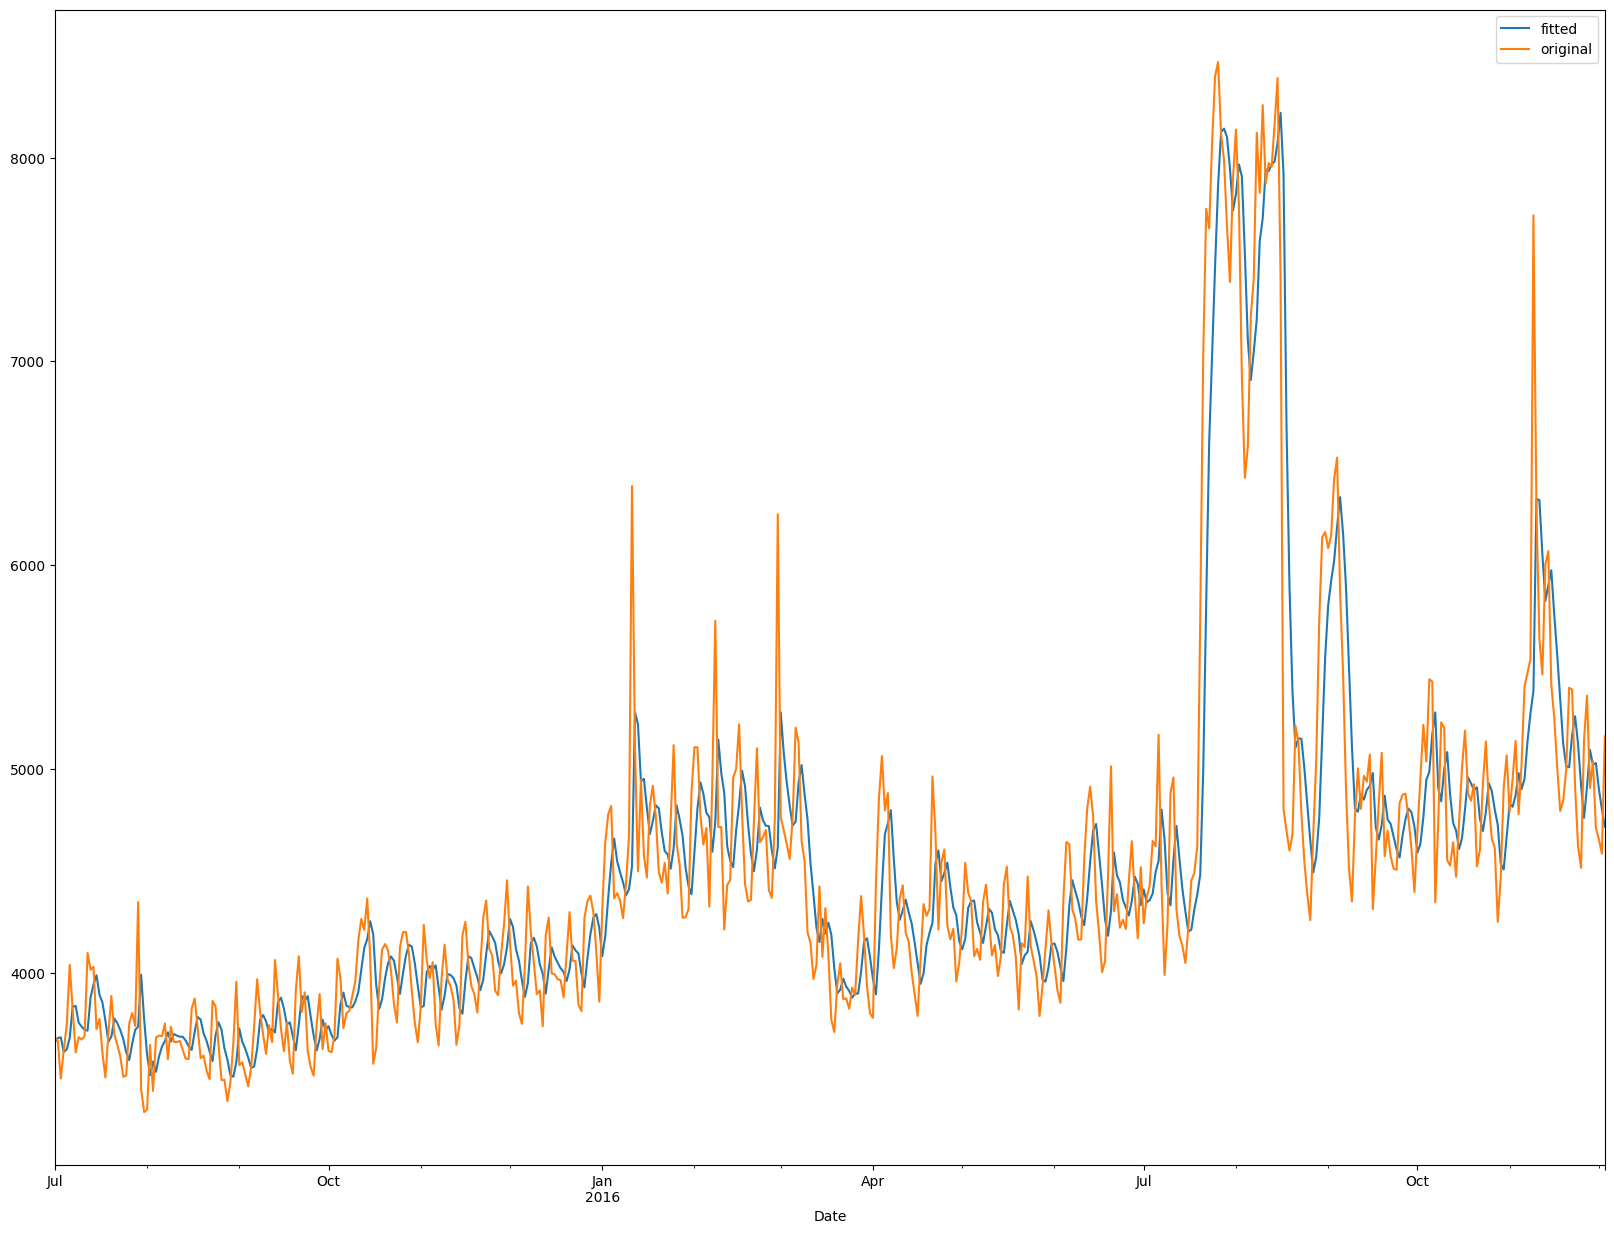

In [86]:
model = sm.tsa.ExponentialSmoothing(train_x.Clicks, trend='add').fit(smoothing_level=0.4)
model.fittedvalues.plot(label='fitted')
train_x.Clicks.plot(label='original')
plt.legend()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Date'>

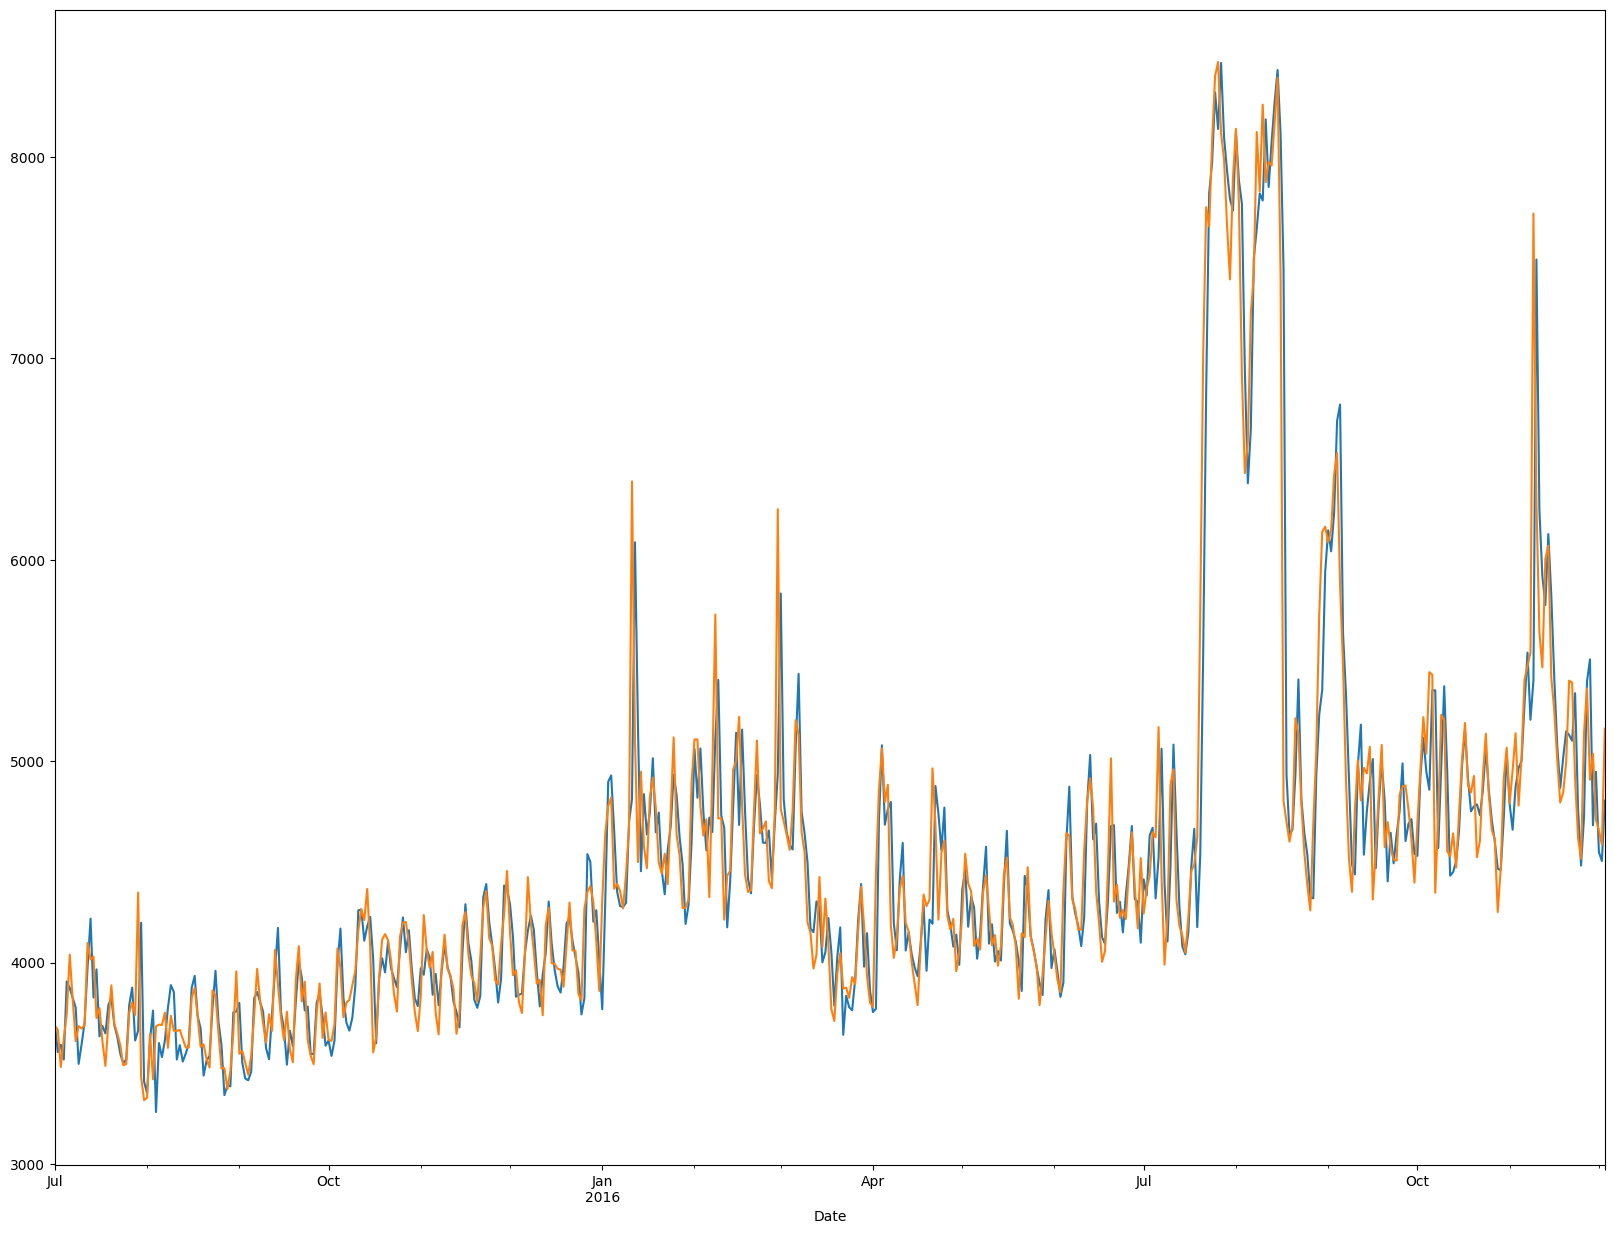

In [87]:
model = sm.tsa.ExponentialSmoothing(train_x.Clicks, trend='add', seasonal='add').fit()
model.fittedvalues.plot()
train_x.Clicks.plot()


MAE : 344.5
RMSE : 437.824
MAPE: 0.067


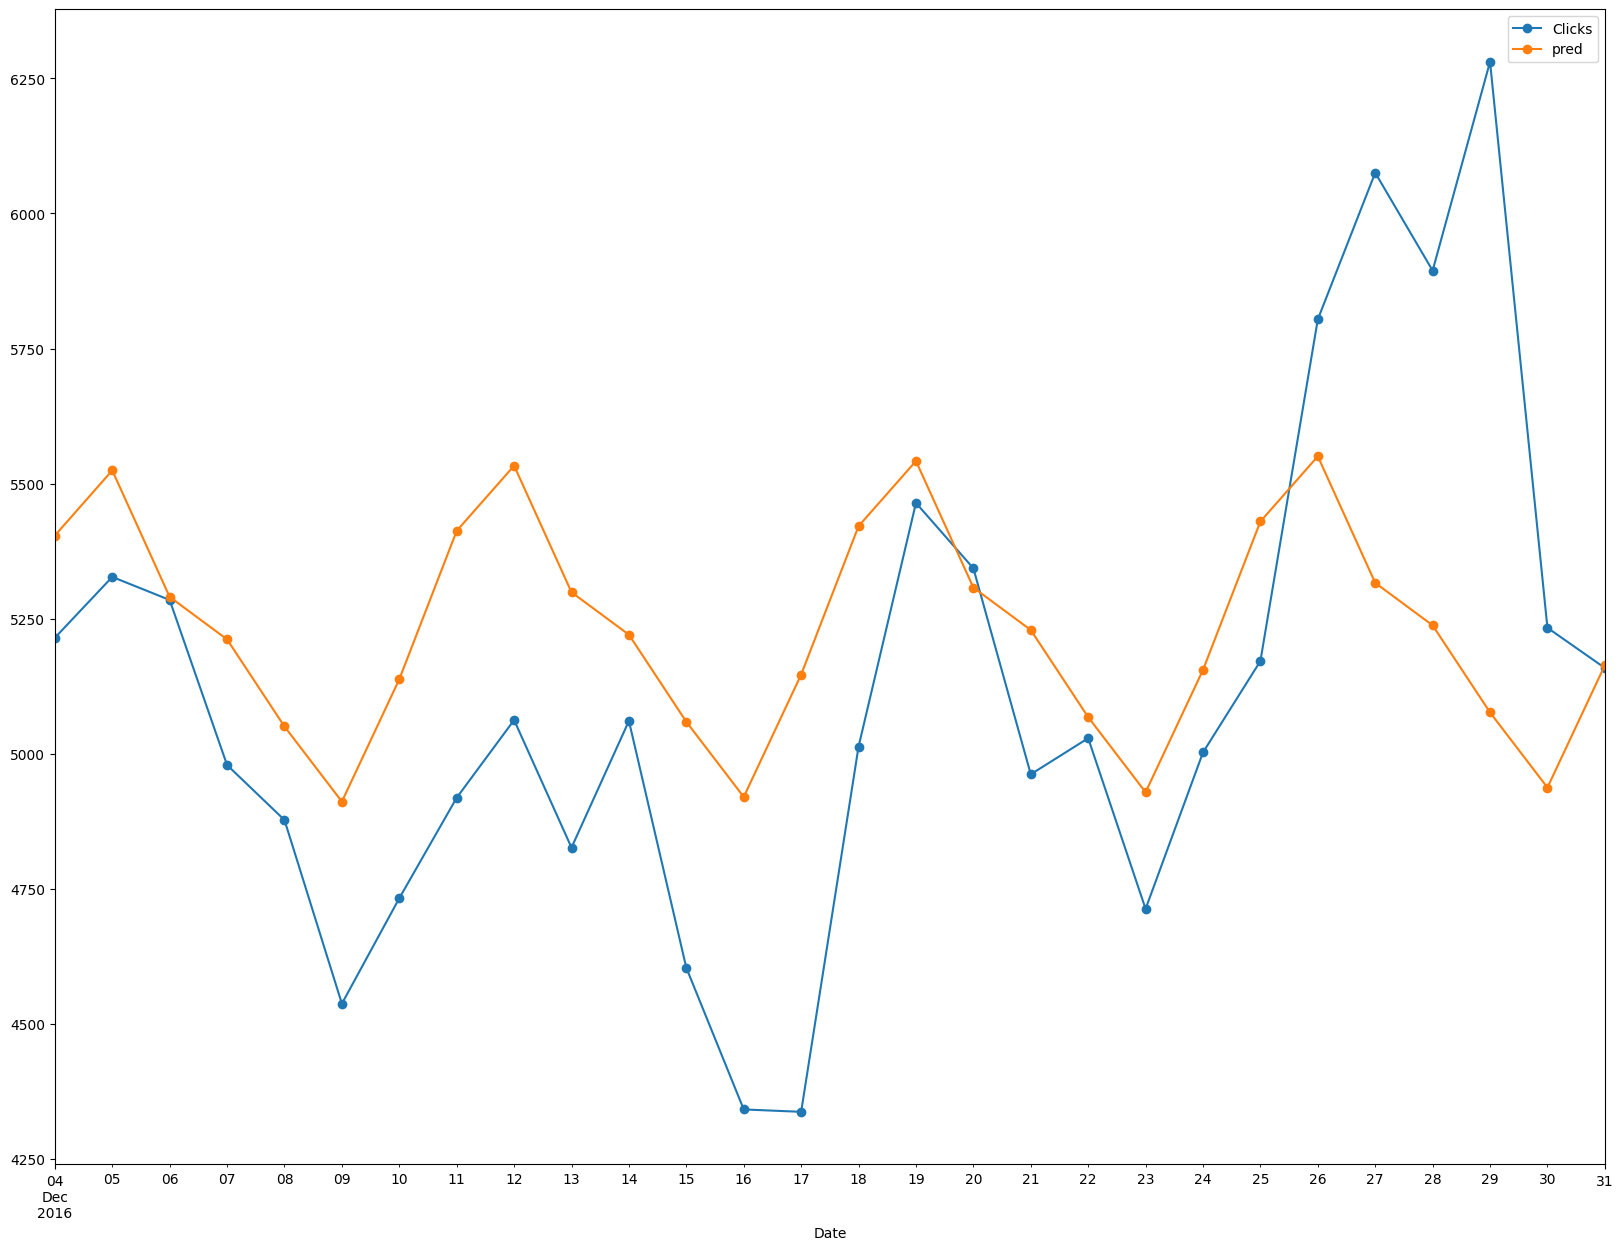

In [88]:
test_x['pred'] = model.forecast(steps = len(test_x))
test_x.plot(style='-o')
performance(test_x['Clicks'], test_x['pred'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Date'>

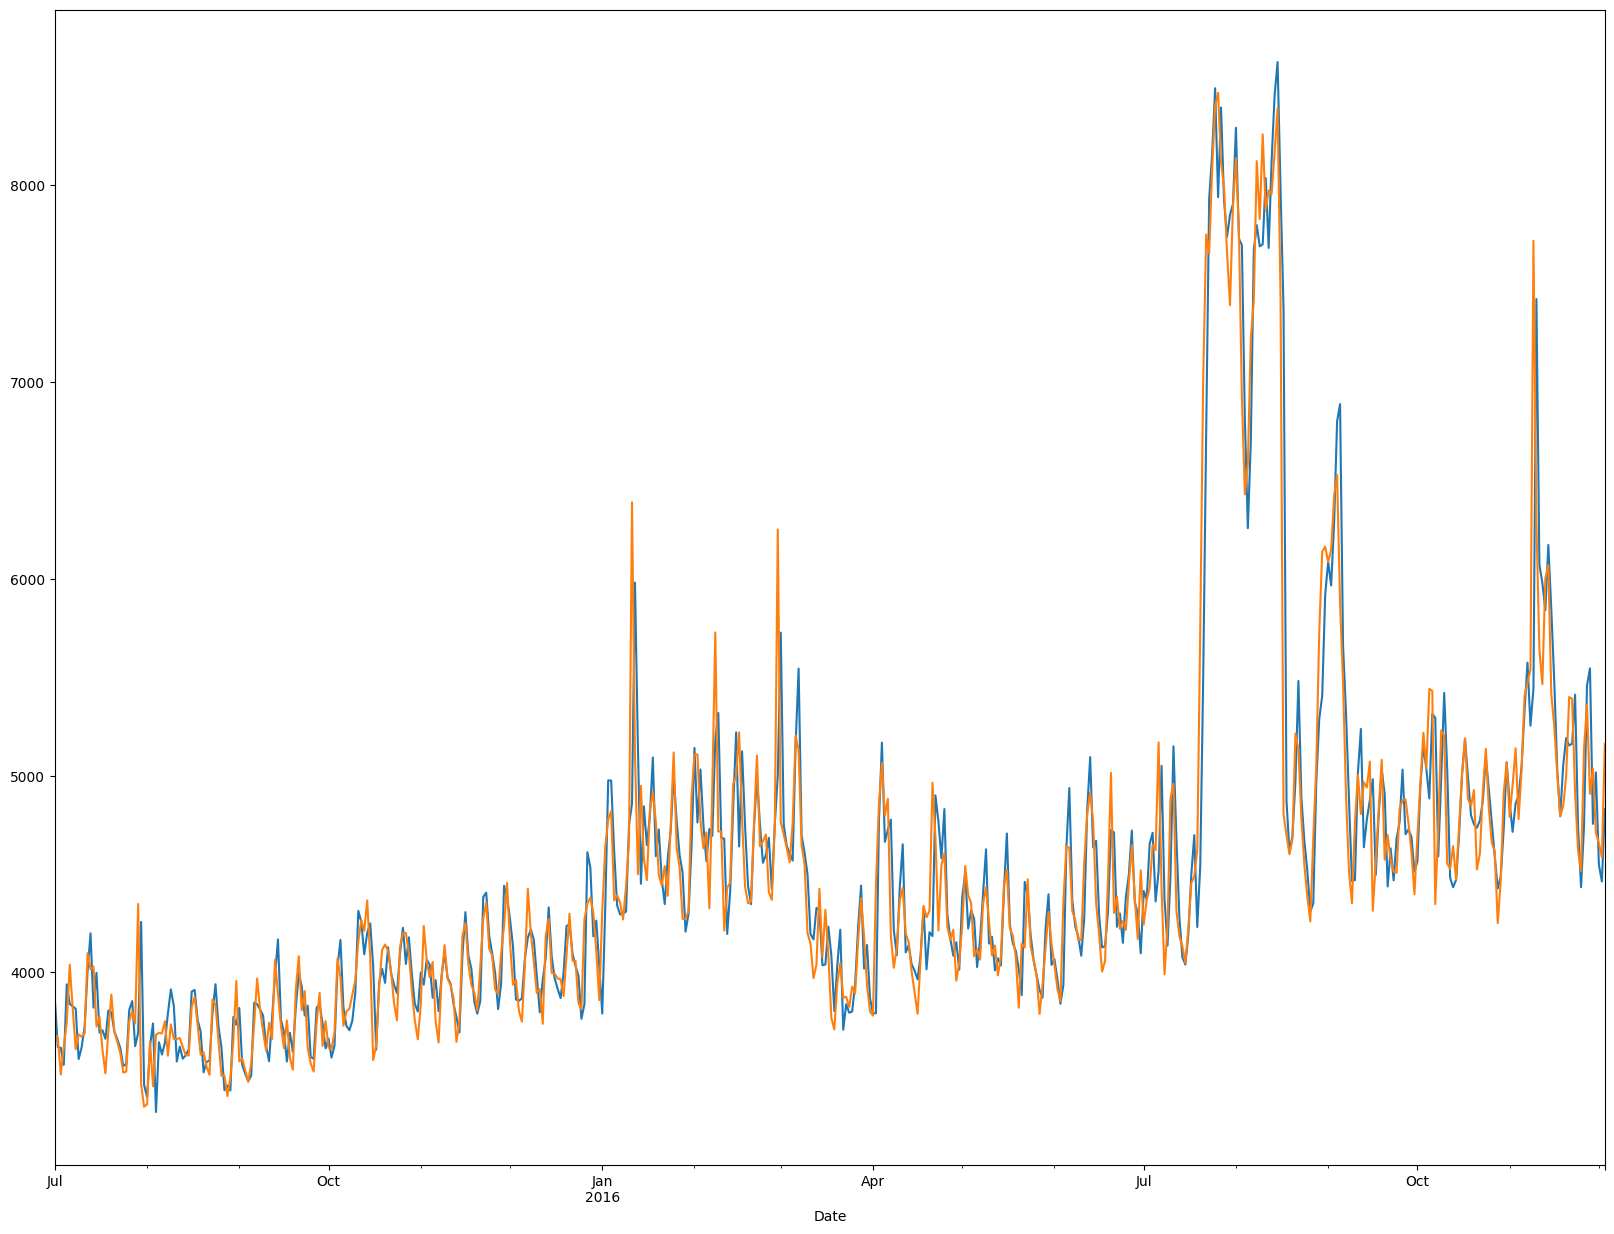

In [89]:
model = sm.tsa.ExponentialSmoothing(train_x.Clicks, trend='add', seasonal='mul').fit()
model.fittedvalues.plot()
train_x.Clicks.plot()


MAE : 480.967
RMSE : 531.427
MAPE: 0.097


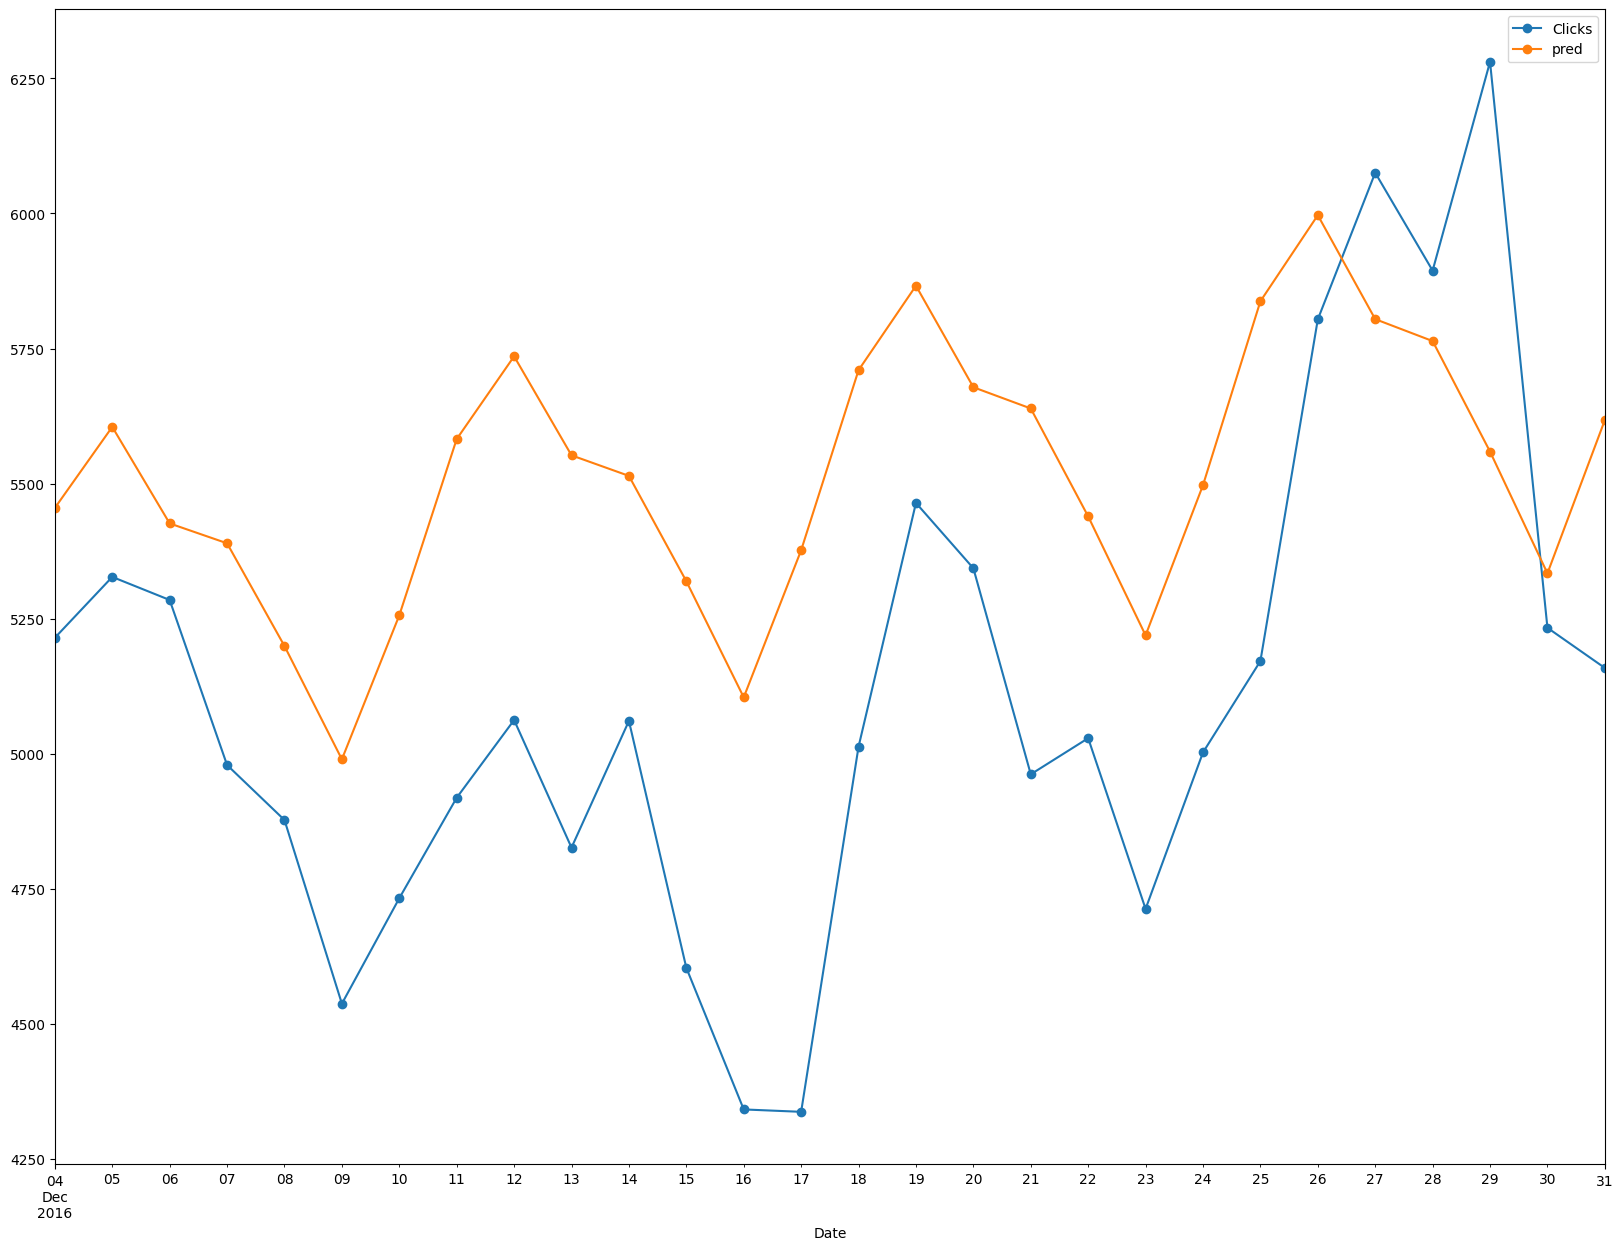

In [90]:
test_x['pred'] = model.forecast(steps = len(test_x))
test_x.plot(style='-o')
performance(test_x['Clicks'], test_x['pred'])

# **ARIMA :**
Autoregressive Integrated Moving Average (ARIMA) model, and extensions
This model is the basic interface for ARIMA-type models, including those with exogenous regressors and those with seasonal components. The most general form of the model is SARIMAX(p, d, q)x(P, D, Q, s). It also allows all specialized cases, including autoregressive

models: AR(p)
moving average models: MA(q)
mixed autoregressive moving average models: ARMA(p, q)
integration models: ARIMA(p, d, q)
seasonal models: SARIMA(P, D, Q, s)
regression with errors that follow one of the above ARIMA-type models


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 392.646
RMSE : 465.251
MAPE: 0.078


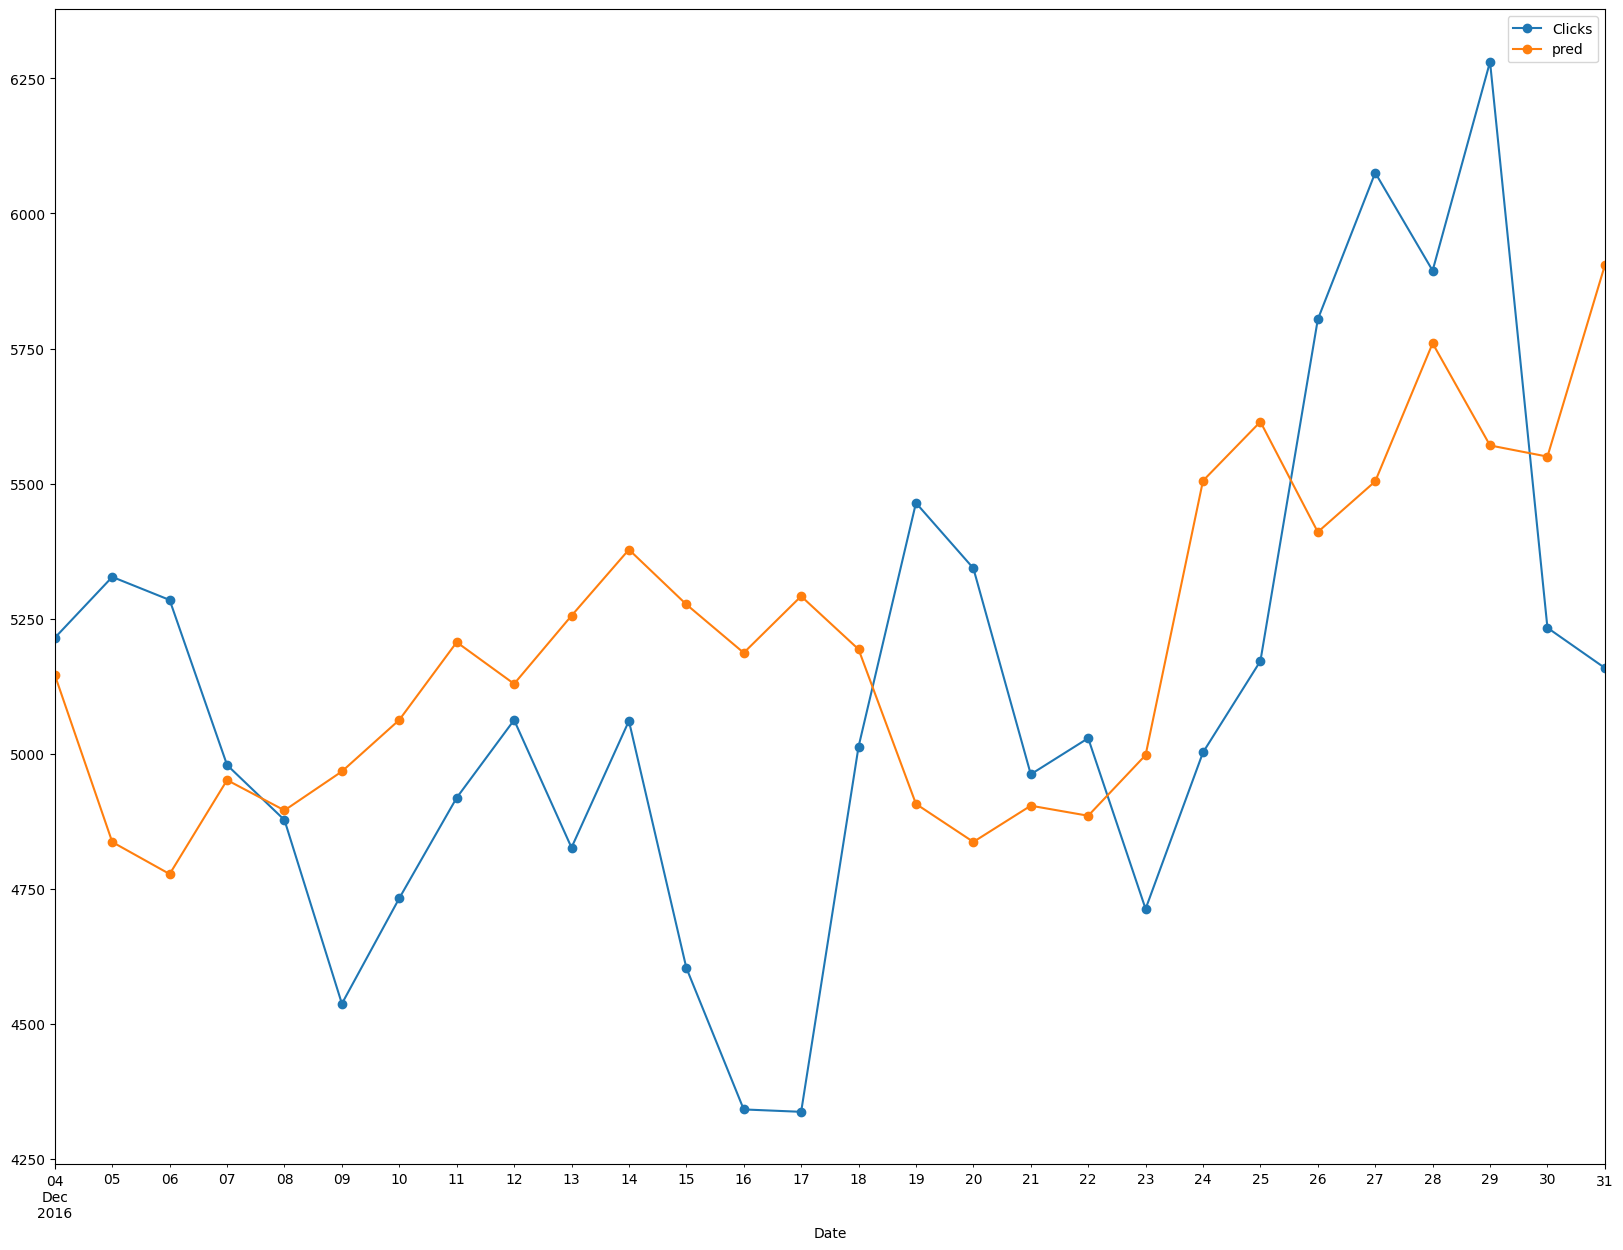

In [91]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_x.Clicks, order=(3, 1, 3), seasonal_order=(1,1,1,52))
model = model.fit(disp=False)
test_x['pred'] = model.forecast(steps=len(test_x))
test_x.plot(style='-o')
performance(test_x['Clicks'], test_x['pred'])


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAE : 457.295
RMSE : 537.536
MAPE: 0.093


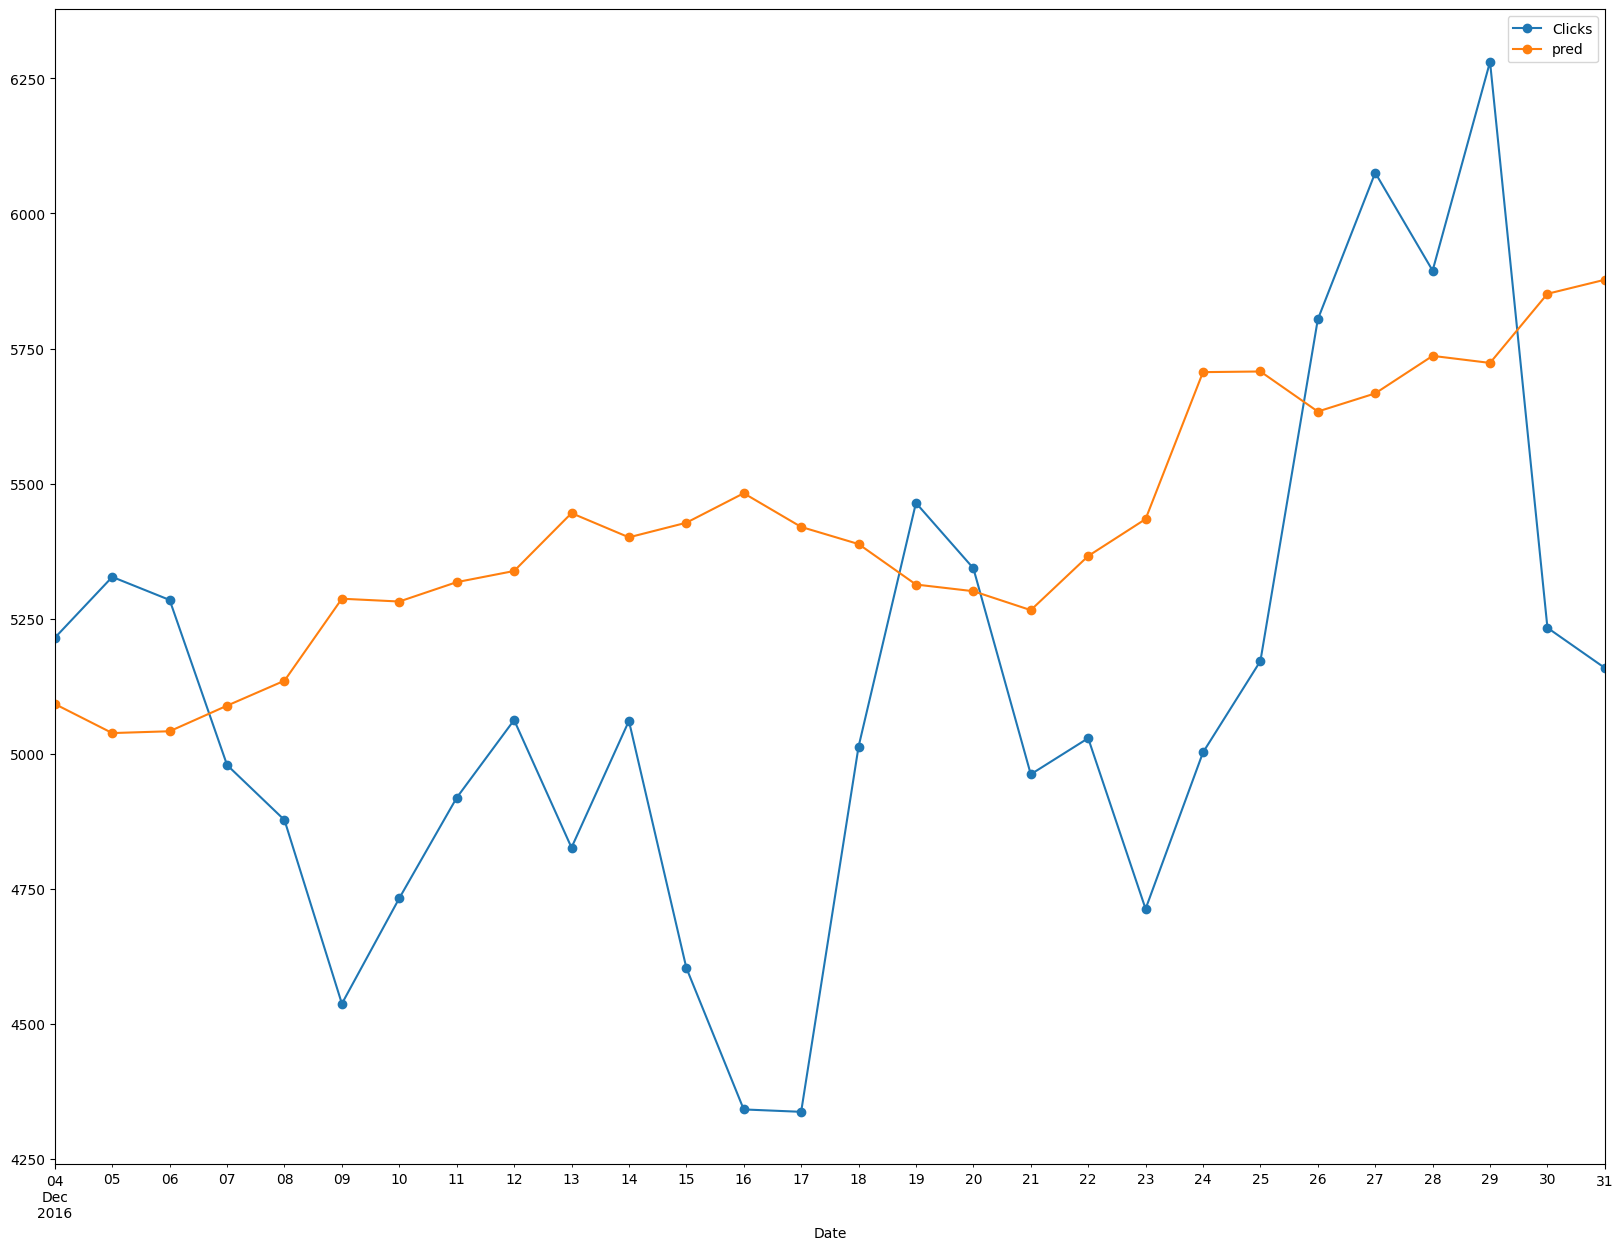

In [92]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_x.Clicks, order=(1, 1, 1), seasonal_order=(1,1,1,52))
model = model.fit(disp=False)
test_x['pred'] = model.forecast(steps=len(test_x))
test_x.plot(style='-o')
performance(test_x['Clicks'], test_x['pred'])


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 304.219
RMSE : 418.097
MAPE: 0.059


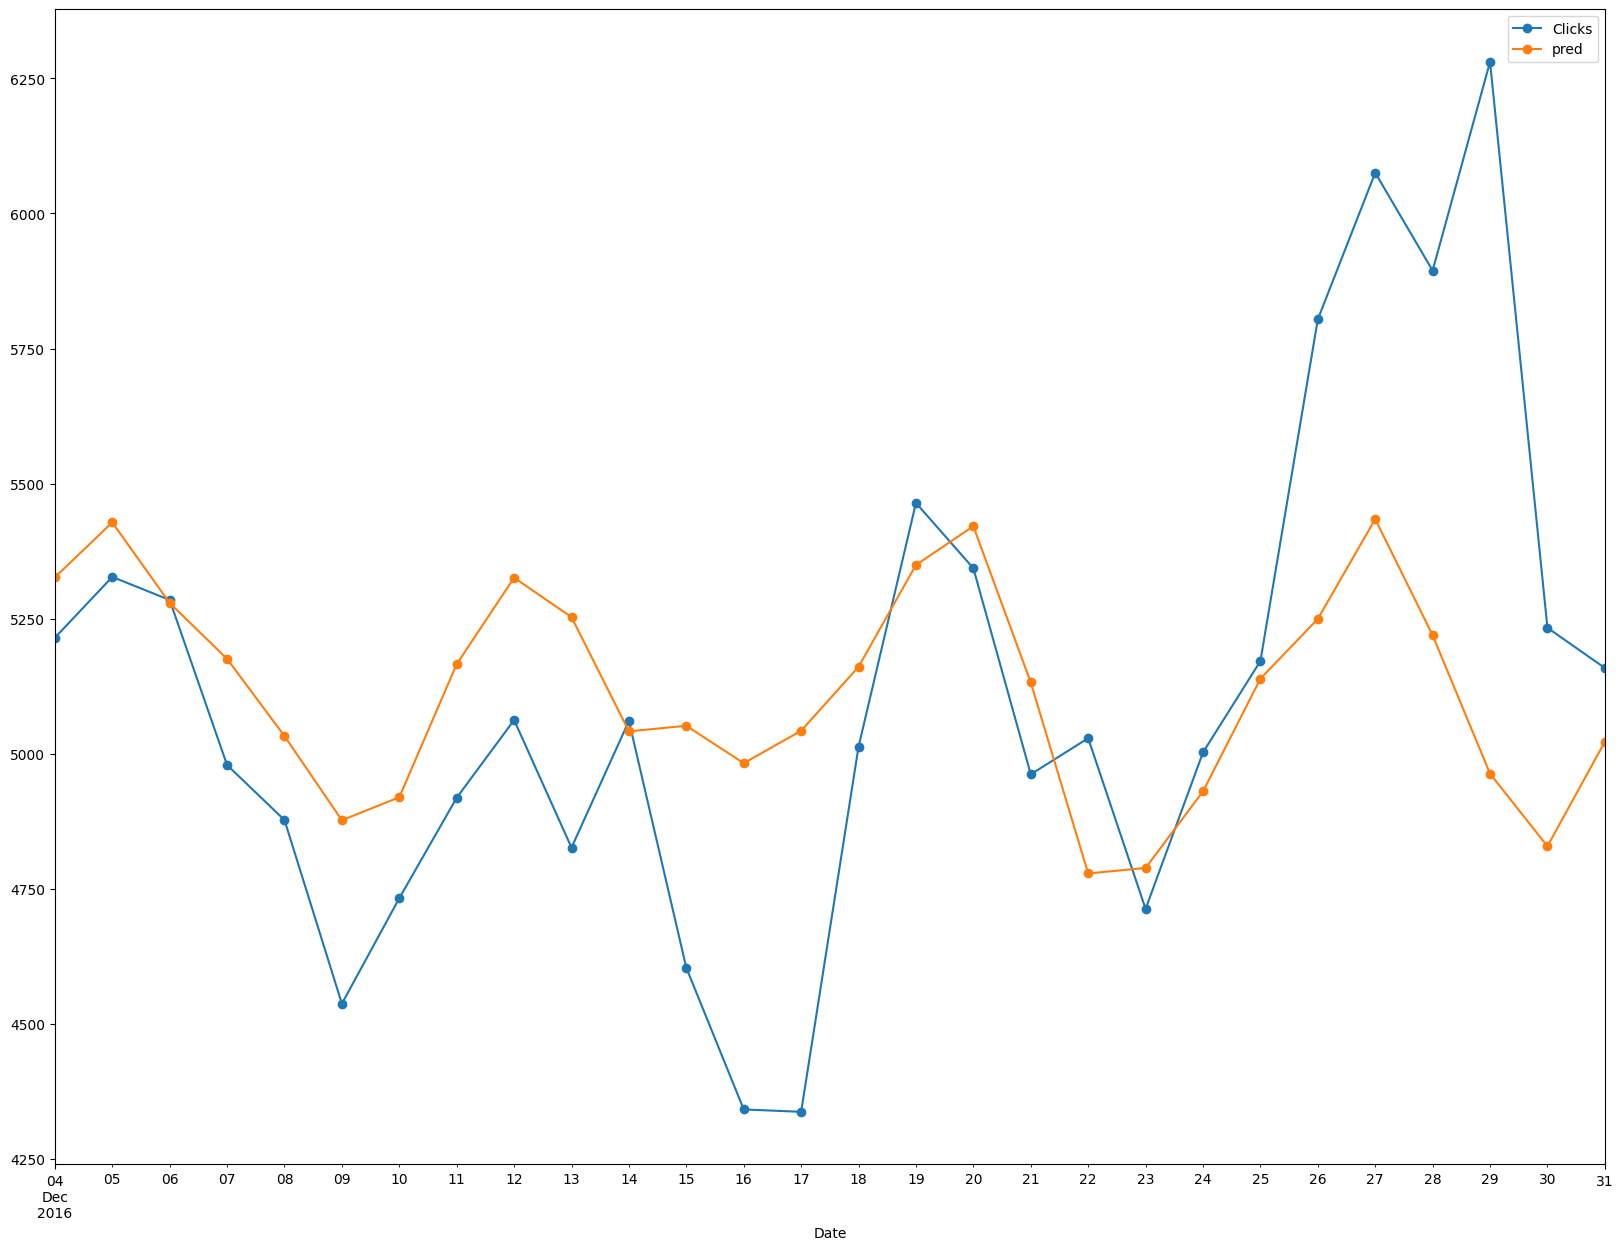

In [93]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_x.Clicks, order=(3, 1, 3), seasonal_order=(1,1,1,12))
model = model.fit(disp=False)
test_x['pred'] = model.forecast(steps=len(test_x))
test_x.plot(style='-o')
performance(test_x['Clicks'], test_x['pred'])


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 353.283
RMSE : 433.449
MAPE: 0.069


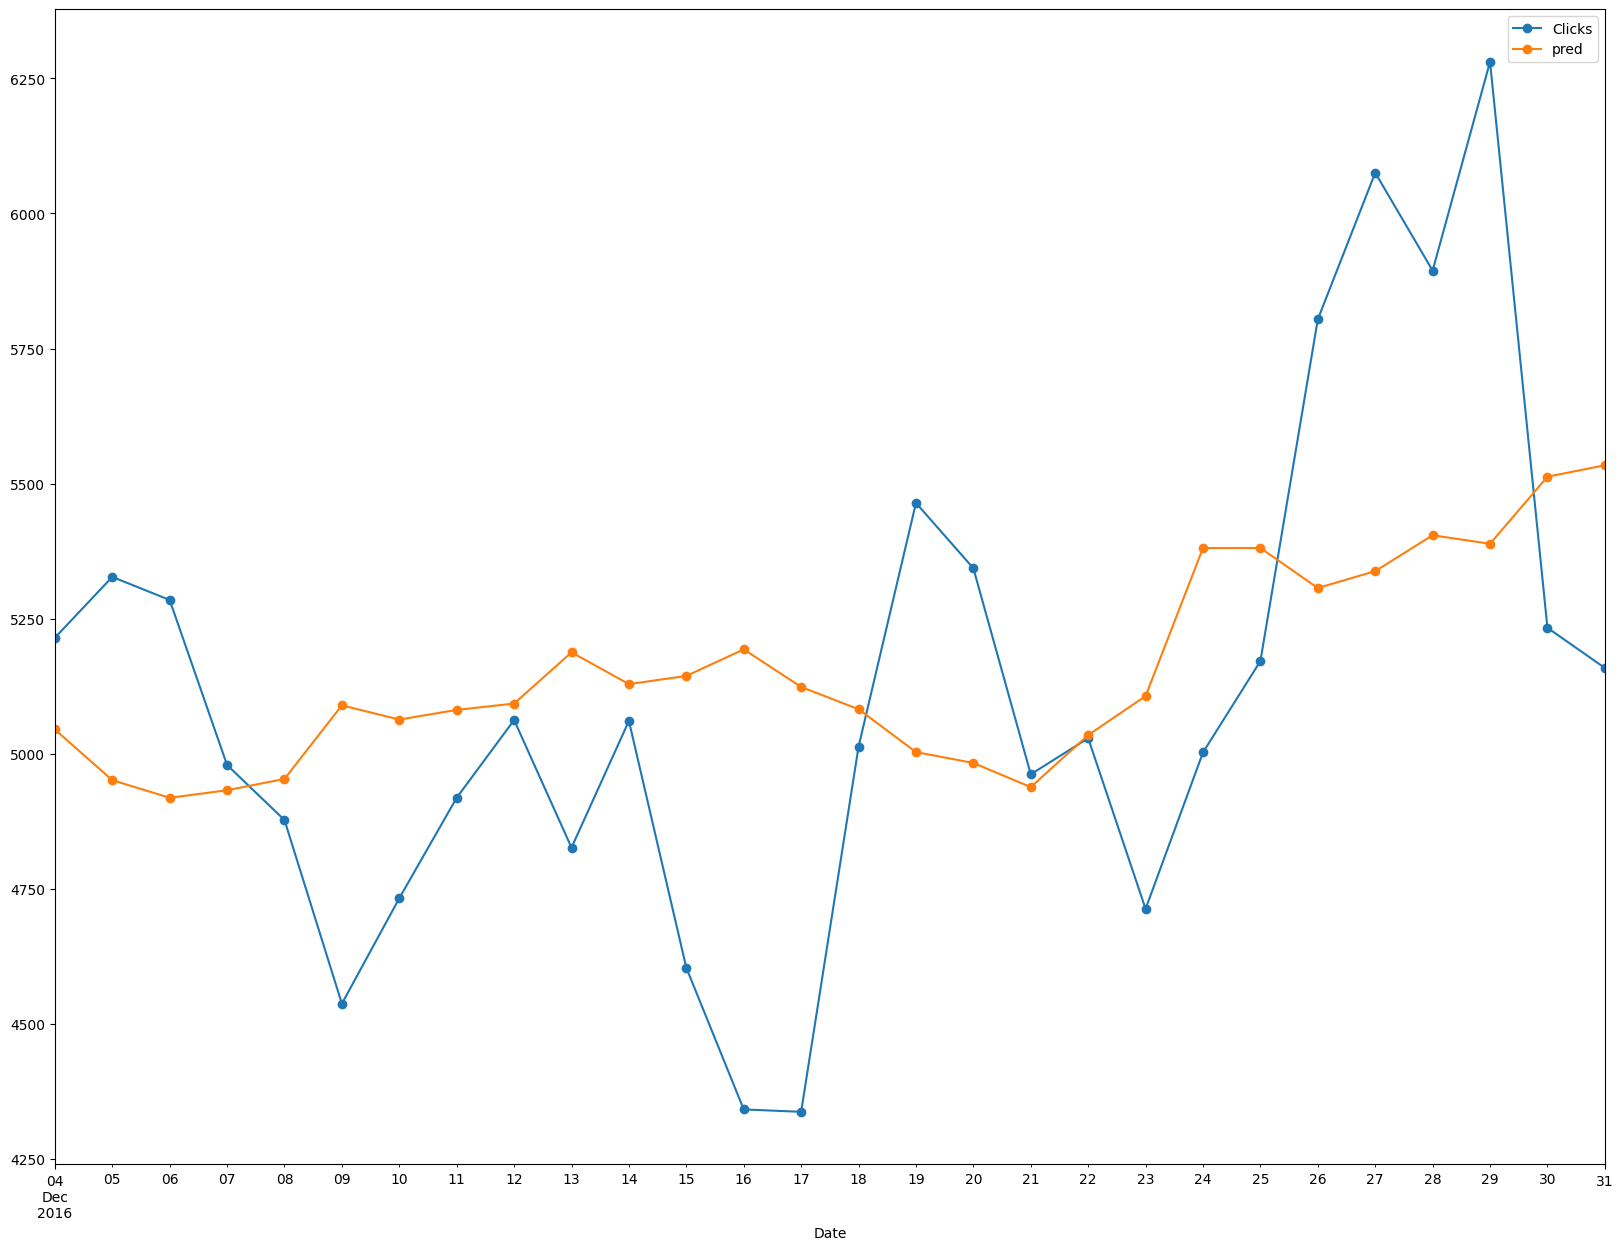

In [94]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_x.Clicks, order=(1, 1, 1), seasonal_order=(2,1,2,52))
model = model.fit(disp=False)
test_x['pred'] = model.forecast(steps=len(test_x))
test_x.plot(style='-o')
performance(test_x['Clicks'], test_x['pred'])

In [95]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
dfpr=dfmean.copy()
dfpr.reset_index(inplace=True)


In [96]:
dfpr.head()

Date       Clicks
0 2015-07-01  3685.929102
1 2015-07-02  3666.183423
2 2015-07-03  3481.298706
3 2015-07-04  3621.009453
4 2015-07-05  3745.193185

In [97]:
Exog_Campaign_eng.head()

Exog
0     0
1     0
2     0
3     0
4     0

In [98]:
dfpr = pd.concat([dfpr, Exog_Campaign_eng], axis =1)


In [99]:
dfpr.head()

Date       Clicks  Exog
0 2015-07-01  3685.929102     0
1 2015-07-02  3666.183423     0
2 2015-07-03  3481.298706     0
3 2015-07-04  3621.009453     0
4 2015-07-05  3745.193185     0

In [100]:
dfpr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    550 non-null    datetime64[ns]
 1   Clicks  550 non-null    float64       
 2   Exog    550 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 13.0 KB


In [101]:
dfpr['ds'] = pd.to_datetime(dfpr['Date'])
dfpr['y'] = dfpr['Clicks']
dfpr['holiday'] = dfpr['Exog']
dfpr = dfpr[['ds', 'y', 'holiday']]
dfpr.head()


ds            y  holiday
0 2015-07-01  3685.929102        0
1 2015-07-02  3666.183423        0
2 2015-07-03  3481.298706        0
3 2015-07-04  3621.009453        0
4 2015-07-05  3745.193185        0

In [102]:
dfpr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   ds       550 non-null    datetime64[ns]
 1   y        550 non-null    float64       
 2   holiday  550 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 13.0 KB


In [103]:
ind = int(0.95 * len(dfmean))
train_x = dfpr.iloc[:ind, :]
test_x = dfpr.iloc[ind: , :]


In [104]:
import cmdstanpy
cmdstanpy.install_cmdstan()

CmdStan install directory: /root/.cmdstan
Installing CmdStan version: 2.35.0
Download successful, file: /tmp/tmpuih48vin
Extracting distribution


DEBUG:cmdstanpy:cmd: make build -j1
cwd: None


Unpacked download as cmdstan-2.35.0
Building version cmdstan-2.35.0, may take several minutes, depending on your system.


DEBUG:cmdstanpy:cmd: make examples/bernoulli/bernoulli
cwd: None


Installed cmdstan-2.35.0
Test model compilation


True

In [105]:
import os
m = Prophet()
m.fit(train_x[['ds', 'y']])#
future = m.make_future_dataframe(periods=30, freq="D")
forecast = m.predict(future)
forecast.head()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/w74jz4rq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/eiqih7ej.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3658', 'data', 'file=/tmp/tmp77otyfnf/w74jz4rq.json', 'init=/tmp/tmp77otyfnf/eiqih7ej.json', 'output', 'file=/tmp/tmp77otyfnf/prophet_model4u_gvo2h/prophet_model-20240916121047.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:10:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:10:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds        trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0 2015-07-01  3571.538556  2664.637399  4391.486037  3571.538556  3571.538556   
1 2015-07-02  3574.983295  2531.466810  4313.284898  3574.983295  3574.983295   
2 2015-07-03  3578.428033  2404.765326  4171.032339  3578.428033  3578.428033   
3 2015-07-04  3581.872771  2525.852668  4292.184912  3581.872771  3581.872771   
4 2015-07-05  3585.317510  2839.845569  4589.042331  3585.317510  3585.317510   

   additive_terms  additive_terms_lower  additive_terms_upper      weekly  \
0       -4.670096             -4.670096             -4.670096   -4.670096   
1     -117.039689           -117.039689           -117.039689 -117.039689   
2     -244.576456           -244.576456           -244.576456 -244.576456   
3     -156.801086           -156.801086           -156.801086 -156.801086   
4      138.608441            138.608441            138.608441  138.608441   

   weekly_lower  weekly_upper  multiplicative_terms  \
0     -4.670096     -4.670096                   0.0   
1   -117.039689   -117.039689                   0.0   
2   -244.576456   -244.576456                   0.0   
3   -156.801086   -156.801086                   0.0   
4    138.608441    138.608441                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper         yhat  
0                         0.0                         0.0  3566.868460  
1                         0.0                         0.0  3457.943605  
2                         0.0                         0.0  3333.851577  
3                         0.0                         0.0  3425.071685  
4                         0.0                         0.0  3723.925950

In [106]:
train_x


ds            y  holiday
0   2015-07-01  3685.929102        0
1   2015-07-02  3666.183423        0
2   2015-07-03  3481.298706        0
3   2015-07-04  3621.009453        0
4   2015-07-05  3745.193185        0
..         ...          ...      ...
517 2016-11-29  5037.229987        0
518 2016-11-30  4708.484643        0
519 2016-12-01  4656.350876        0
520 2016-12-02  4585.132228        0
521 2016-12-03  5160.848353        0

[522 rows x 3 columns]

In [107]:
forecast


ds        trend   yhat_lower   yhat_upper  trend_lower  \
0   2015-07-01  3571.538556  2664.637399  4391.486037  3571.538556   
1   2015-07-02  3574.983295  2531.466810  4313.284898  3574.983295   
2   2015-07-03  3578.428033  2404.765326  4171.032339  3578.428033   
3   2015-07-04  3581.872771  2525.852668  4292.184912  3581.872771   
4   2015-07-05  3585.317510  2839.845569  4589.042331  3585.317510   
..         ...          ...          ...          ...          ...   
547 2016-12-29  4875.854726  3882.708768  5677.493803  4853.667514   
548 2016-12-30  4871.207618  3754.635185  5503.294028  4847.624393   
549 2016-12-31  4866.560510  3815.887258  5626.108507  4841.411637   
550 2017-01-01  4861.913401  4100.305358  5884.980969  4835.270579   
551 2017-01-02  4857.266293  4367.880307  6066.360361  4828.869208   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0    3571.538556       -4.670096             -4.670096             -4.670096   
1    3574.983295     -117.039689           -117.039689           -117.039689   
2    3578.428033     -244.576456           -244.576456           -244.576456   
3    3581.872771     -156.801086           -156.801086           -156.801086   
4    3585.317510      138.608441            138.608441            138.608441   
..           ...             ...                   ...                   ...   
547  4898.543450     -117.039689           -117.039689           -117.039689   
548  4895.213804     -244.576456           -244.576456           -244.576456   
549  4892.569882     -156.801086           -156.801086           -156.801086   
550  4889.455255      138.608441            138.608441            138.608441   
551  4886.622101      320.386461            320.386461            320.386461   

         weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0     -4.670096     -4.670096     -4.670096                   0.0   
1   -117.039689   -117.039689   -117.039689                   0.0   
2   -244.576456   -244.576456   -244.576456                   0.0   
3   -156.801086   -156.801086   -156.801086                   0.0   
4    138.608441    138.608441    138.608441                   0.0   
..          ...           ...           ...                   ...   
547 -117.039689   -117.039689   -117.039689                   0.0   
548 -244.576456   -244.576456   -244.576456                   0.0   
549 -156.801086   -156.801086   -156.801086                   0.0   
550  138.608441    138.608441    138.608441                   0.0   
551  320.386461    320.386461    320.386461                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper         yhat  
0                           0.0                         0.0  3566.868460  
1                           0.0                         0.0  3457.943605  
2                           0.0                         0.0  3333.851577  
3                           0.0                         0.0  3425.071685  
4                           0.0                         0.0  3723.925950  
..                          ...                         ...          ...  
547                         0.0                         0.0  4758.815037  
548                         0.0                         0.0  4626.631162  
549                         0.0                         0.0  4709.759423  
550                         0.0                         0.0  5000.521842  
551                         0.0                         0.0  5177.652754  

[552 rows x 16 columns]

In [108]:
forecast1 = m.predict(test_x[['ds']])
forecast1.head()

ds        trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0 2016-12-04  4992.032434  4256.904325  6068.546902  4992.032434  4992.032434   
1 2016-12-05  4987.385326  4376.058672  6178.738695  4987.385326  4987.385326   
2 2016-12-06  4982.738217  4193.446451  5941.237728  4982.738217  4982.738217   
3 2016-12-07  4978.091109  4068.311275  5863.196999  4978.091109  4978.091109   
4 2016-12-08  4973.444001  3921.578032  5714.970510  4973.199055  4973.444001   

   additive_terms  additive_terms_lower  additive_terms_upper      weekly  \
0      138.608441            138.608441            138.608441  138.608441   
1      320.386461            320.386461            320.386461  320.386461   
2       64.092426             64.092426             64.092426   64.092426   
3       -4.670096             -4.670096             -4.670096   -4.670096   
4     -117.039689           -117.039689           -117.039689 -117.039689   

   weekly_lower  weekly_upper  multiplicative_terms  \
0    138.608441    138.608441                   0.0   
1    320.386461    320.386461                   0.0   
2     64.092426     64.092426                   0.0   
3     -4.670096     -4.670096                   0.0   
4   -117.039689   -117.039689                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper         yhat  
0                         0.0                         0.0  5130.640874  
1                         0.0                         0.0  5307.771786  
2                         0.0                         0.0  5046.830644  
3                         0.0                         0.0  4973.421013  
4                         0.0                         0.0  4856.404312

In [109]:
# Calculate MAE, MSE, and RMSE
performance(test_x['y'], forecast1['yhat'])

MAE : 322.591
RMSE : 480.707
MAPE: 0.06


In [110]:

dist = np.array(test_x['y'].to_list()) - np.array(forecast1['yhat'].to_list())
#
dist


array([  83.97476267,   19.52801114,  237.79268334,    5.68472066,
         20.9318912 , -186.87144453,  -74.78046514, -179.55862026,
       -212.82977631, -188.05524524,  119.86025381, -220.1054869 ,
       -350.06312843, -437.61689277,  -52.50264055,  221.54083663,
        361.54140053,   53.60059008,  237.4419936 ,   53.63546658,
        260.15686268,  138.50962383,  593.85392943, 1126.19396535,
       1018.42747759, 1521.93634951,  606.48799837,  449.05594543])

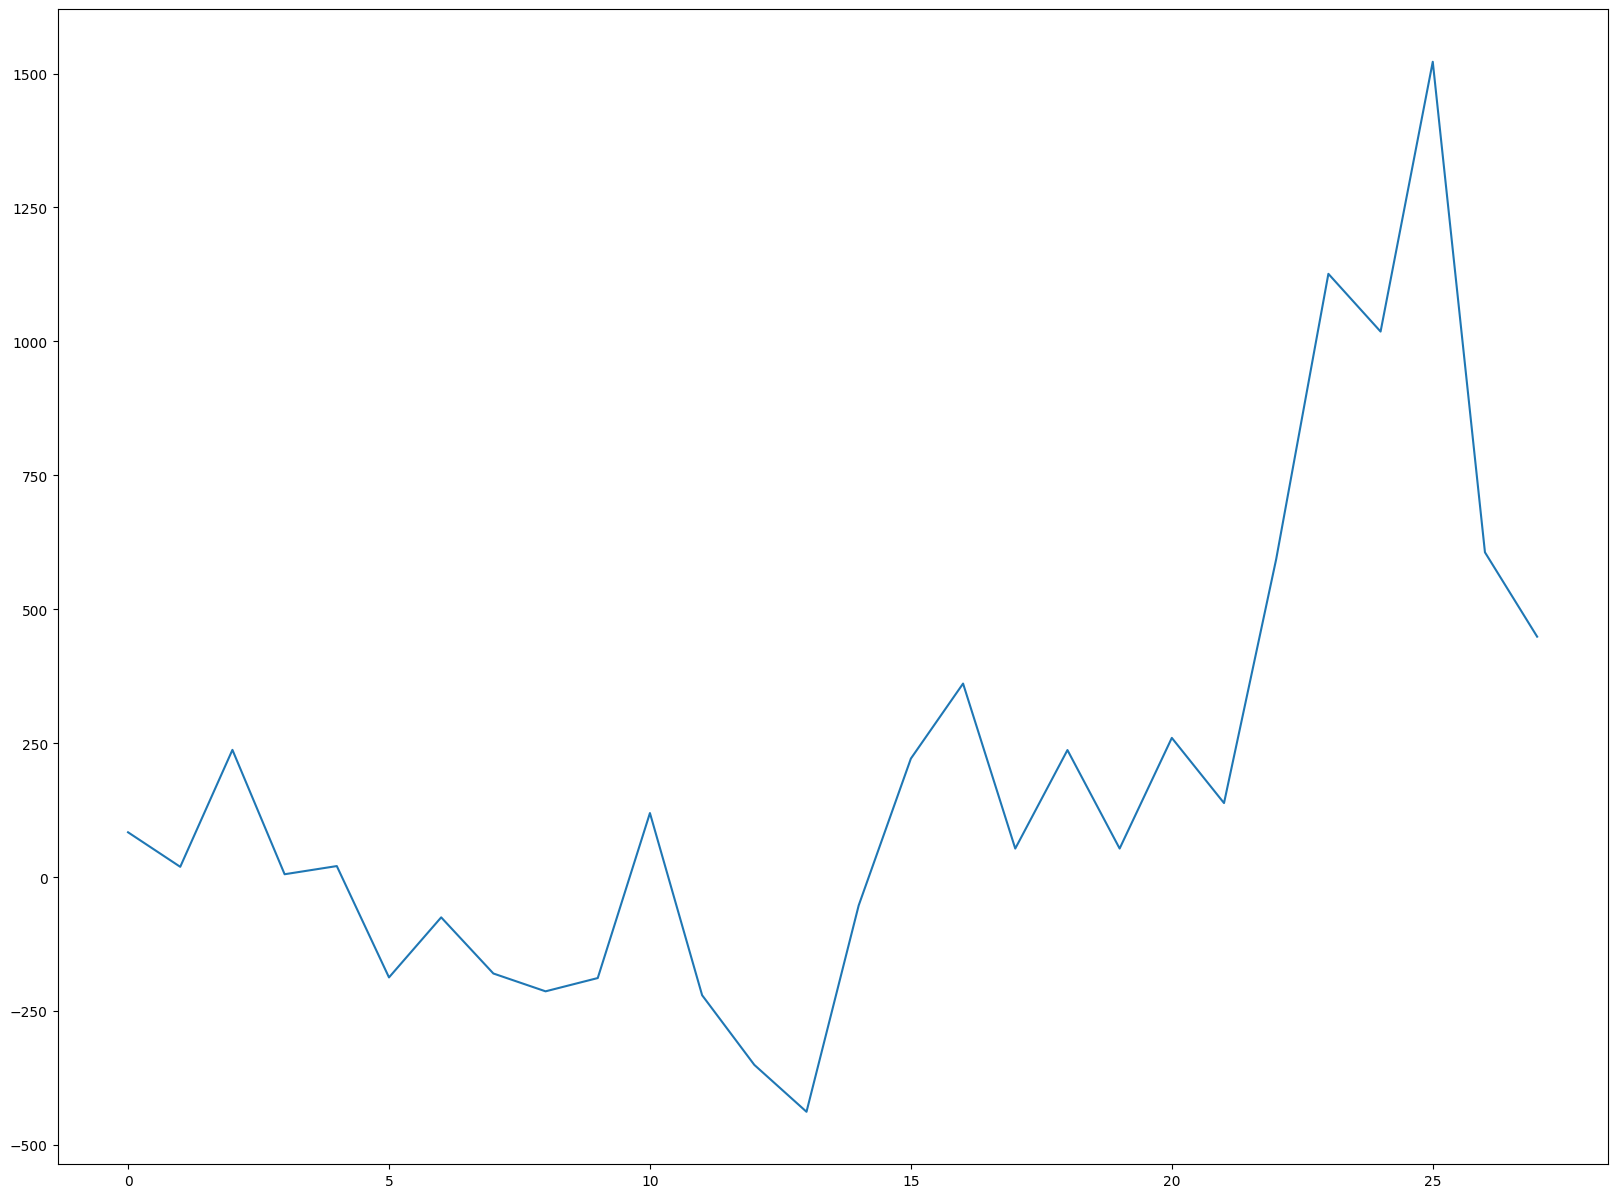

In [111]:
plt.plot(dist)


In [112]:
from prophet.diagnostics import cross_validation
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
# Define the hyperparameter grid
param_grid = {
 'seasonality_mode': ['additive', 'multiplicative'],
 'changepoint_prior_scale': [0.01, 0.1, 0.5],
 'seasonality_prior_scale': [1, 10, 30],
}
# Helper function to evaluate the model
def evaluate_model(model, metric_func):
 df_cv = cross_validation(model, initial='30 days', period='80 days', horizon='60 days')
 return metric_func(df_cv['y'], df_cv['yhat'])
# Grid search
best_params = {}
best_score = float('inf')
for mode in param_grid['seasonality_mode']:
 for cps in param_grid['changepoint_prior_scale']:
  for sps in param_grid['seasonality_prior_scale']:

 # Create a model with the current hyperparameters
     model = Prophet(seasonality_mode=mode, changepoint_prior_scale=cps, seasonality_prior_scale= sps)
     model.fit(train_x)
 # Evaluate the model using Mean Absolute Error (MAE)
     score = evaluate_model(model, mean_absolute_error)
 # Update best parameters if necessary
     if score < best_score:
      best_score = score
      best_params = {
        'seasonality_mode': mode,
        'changepoint_prior_scale': cps,
        'seasonality_prior_scale': sps
         }
print(best_params)
print(best_score)
# Create the best model with the optimal hyperparameters
best_model = Prophet(**best_params)
best_model.fit(train_x)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/bwgn34mr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/xiryym41.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93738', 'data', 'file=/tmp/tmp77otyfnf/bwgn34mr.json', 'init=/tmp/tmp77otyfnf/xiryym41.json', 'output', 'file=/tmp/tmp77otyfnf/prophet_modelsutysaso/prophet_model-20240916121048.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:10:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:10:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 6 forecasts with cut

  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/f51k2y_2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/j75ezag4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28681', 'data', 'file=/tmp/tmp77otyfnf/f51k2y_2.json', 'init=/tmp/tmp77otyfnf/j75ezag4.json', 'output', 'file=/tmp/tmp77otyfnf/prophet_modelwch55cyx/prophet_model-20240916121049.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:10:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:10:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/j2dzdbgg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/oo9mag3z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/c7x7sep5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/dfetlxca.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89589', 'data', 'file=/tmp/tmp77otyfnf/c7x7sep5.json', 'init=/tmp/tmp77otyfnf/dfetlxca.json', 'output', 'file=/tmp/tmp77otyfnf/prophet_modelg5eb2ci6/prophet_model-20240916121050.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:10:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:10:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/90_57uk5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/fsqdn_yq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/fzpo2vah.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/6t9oqivy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74108', 'data', 'file=/tmp/tmp77otyfnf/fzpo2vah.json', 'init=/tmp/tmp77otyfnf/6t9oqivy.json', 'output', 'file=/tmp/tmp77otyfnf/prophet_modele_f1jama/prophet_model-20240916121051.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:10:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:10:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/kalrl3wj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/u4m4wwyt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/26757mii.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/wnp1a9kp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51217', 'data', 'file=/tmp/tmp77otyfnf/26757mii.json', 'init=/tmp/tmp77otyfnf/wnp1a9kp.json', 'output', 'file=/tmp/tmp77otyfnf/prophet_modelvh1d3wf5/prophet_model-20240916121053.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:10:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:10:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/xuhcyj06.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/54stxbsl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/_155v8s6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/ogimw9_h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63790', 'data', 'file=/tmp/tmp77otyfnf/_155v8s6.json', 'init=/tmp/tmp77otyfnf/ogimw9_h.json', 'output', 'file=/tmp/tmp77otyfnf/prophet_modelfezy67oh/prophet_model-20240916121054.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:10:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:10:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/pim4o1v8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/w6meonrg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/pxqqzinw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/dqp99ebo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56816', 'data', 'file=/tmp/tmp77otyfnf/pxqqzinw.json', 'init=/tmp/tmp77otyfnf/dqp99ebo.json', 'output', 'file=/tmp/tmp77otyfnf/prophet_model5vflh87o/prophet_model-20240916121056.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:10:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:10:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/soqz12qd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/v6ipjmd5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/fj6krjms.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/y5c4qn8q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45763', 'data', 'file=/tmp/tmp77otyfnf/fj6krjms.json', 'init=/tmp/tmp77otyfnf/y5c4qn8q.json', 'output', 'file=/tmp/tmp77otyfnf/prophet_model89q2970k/prophet_model-20240916121059.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:10:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:10:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/01i552yu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/6_vtw39r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/0u2tq2le.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/q3blg5y6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46036', 'data', 'file=/tmp/tmp77otyfnf/0u2tq2le.json', 'init=/tmp/tmp77otyfnf/q3blg5y6.json', 'output', 'file=/tmp/tmp77otyfnf/prophet_modelpsg67atb/prophet_model-20240916121102.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:11:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:11:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/f_f038z7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/4wh56ad1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/__l2c5f7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/43p1iqhm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26471', 'data', 'file=/tmp/tmp77otyfnf/__l2c5f7.json', 'init=/tmp/tmp77otyfnf/43p1iqhm.json', 'output', 'file=/tmp/tmp77otyfnf/prophet_modelp8nk_3kt/prophet_model-20240916121104.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:11:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:11:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/hki0mkyl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/wp1uu3x0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/0qb2jglo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/lkkcq5b4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17477', 'data', 'file=/tmp/tmp77otyfnf/0qb2jglo.json', 'init=/tmp/tmp77otyfnf/lkkcq5b4.json', 'output', 'file=/tmp/tmp77otyfnf/prophet_model66nehosq/prophet_model-20240916121106.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:11:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:11:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/o7mrfqo1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/ec9ohf1d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/3q7a0cw5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/2hrd5zjg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65920', 'data', 'file=/tmp/tmp77otyfnf/3q7a0cw5.json', 'init=/tmp/tmp77otyfnf/2hrd5zjg.json', 'output', 'file=/tmp/tmp77otyfnf/prophet_model_2ne6e4a/prophet_model-20240916121107.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:11:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:11:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/mikredxs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/nrnos7k7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/8n5u90ya.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/67w0ubc8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22451', 'data', 'file=/tmp/tmp77otyfnf/8n5u90ya.json', 'init=/tmp/tmp77otyfnf/67w0ubc8.json', 'output', 'file=/tmp/tmp77otyfnf/prophet_model6teuikq2/prophet_model-20240916121109.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:11:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:11:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/z55bhsjp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/2qhzcrxg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/yr199sez.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/9s9khta1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70997', 'data', 'file=/tmp/tmp77otyfnf/yr199sez.json', 'init=/tmp/tmp77otyfnf/9s9khta1.json', 'output', 'file=/tmp/tmp77otyfnf/prophet_modeliourewtd/prophet_model-20240916121110.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:11:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:11:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/pconmb0t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/3nq87xf_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/mg8ro3rg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/hooqecos.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19267', 'data', 'file=/tmp/tmp77otyfnf/mg8ro3rg.json', 'init=/tmp/tmp77otyfnf/hooqecos.json', 'output', 'file=/tmp/tmp77otyfnf/prophet_modelzt9l_q21/prophet_model-20240916121112.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:11:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:11:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/g6p05pgr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/x_opo6i8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/n953wm21.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/uigxejz5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21151', 'data', 'file=/tmp/tmp77otyfnf/n953wm21.json', 'init=/tmp/tmp77otyfnf/uigxejz5.json', 'output', 'file=/tmp/tmp77otyfnf/prophet_modelz1df0eaq/prophet_model-20240916121114.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:11:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:11:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/x6or9gw3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/43u8hoaz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/ddcy1_dk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/f3iqpa6z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3120', 'data', 'file=/tmp/tmp77otyfnf/ddcy1_dk.json', 'init=/tmp/tmp77otyfnf/f3iqpa6z.json', 'output', 'file=/tmp/tmp77otyfnf/prophet_modeln4d4efl_/prophet_model-20240916121116.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:11:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:11:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/_jswe2wg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/e74_1_eu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/mfggb_xx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/t74h8qfi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1546', 'data', 'file=/tmp/tmp77otyfnf/mfggb_xx.json', 'init=/tmp/tmp77otyfnf/t74h8qfi.json', 'output', 'file=/tmp/tmp77otyfnf/prophet_modele0e6ewuo/prophet_model-20240916121119.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:11:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:11:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/wexdyw01.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/9x7xj8yo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/ds_n_xbl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/pkcdy985.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25503', 'data', 'file=/tmp/tmp77otyfnf/ds_n_xbl.json', 'init=/tmp/tmp77otyfnf/pkcdy985.json', 'output', 'file=/tmp/tmp77otyfnf/prophet_modelnwuz3odc/prophet_model-20240916121121.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:11:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:11:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/j8yii1pe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp77otyfnf/87w3croi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

{'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 30}
660.5003879218359


**Inferences and Recommendations :**

inferences made from the data visualizations:
Total 7 languages found in data.
English has the highest number of pages.


3 access types:
all-access 51.2295 %
mobile-web 24.7748 %
desktop 23.9958 %


2 access origins:
agents 75.932526 %
spider 24.067474 %


English language has the highest pages.
Maximum ads should be run on English Page


1. With Checkpoint also the Mean Squared error did not reduces. But with Prophet model without checkpoint it
is giving the best accuracy so far i.e. with MAPE 0.059 with default hyperparameters.
2. Besides Prophet model ExponentialSmoothing model gave the best accuracy i.e. MAPE: 0.057 with hyper
parameter trend='add', seasonal='mul', smoothing_level=1/(2*12)
3. We can conclude that our time series is not stationary. This makes sense because our time series has both,
trend and seasonality.
4. We can see that there is a weekly seasonality
5. Overall the signal trend looks linear but if looked in short term then the signal is quadratic
Recommendation
1. 'na' values for each row is recommended to be filled by using linear interpolation method
2. Outliers were present in the data and shall be treated using the clipping method
3. ExponentialSmoothing model shall be picked as it gave the best accuracy i.e. MAPE: 0.057 with hyper
parameter trend='add', seasonal='mul', smoothing_level=1/(2*12)
4. As the days progresses for prediction nth day the MAPE increase ie. accuracy decreases. Hence, it is
recommended to keep the number of prediction day as low as possible like less than 30 days.


What does the decomposition of series do?

0The decomposition of a time series refers to the process of separating a time series into its components, such as trend, seasonality, and residuals.
These components are intended to represent different underlying patterns in the data. The idea behind decomposition is to break down a complex time series into simpler components that can be more easily understood and analyzed.
Trend component represents the underlying pattern in the data over time, reflecting long-term changes.
Seasonality component represents regular patterns that repeat over a fixed interval, such as daily, weekly, or yearly.
Residual component represents the remaining random fluctuations in the data after removing the trend and seasonality components.
Decomposition is often used in time series analysis to identify and isolate different patterns in the data and to forecast future values. It is also used to
remove seasonality and trend components from the data before applying statistical or machine learning models to the residuals, as this can help to
improve the performance of these models.


What level of differencing gave you a stationary series?

Stationarity is an important property of a time series because many time series analysis techniques assume that the time series is stationary.
A time series is stationary if its mean, variance, and autocorrelation structure are constant over time.
Differencing is a common technique used to make a time series stationary.
It involves subtracting the value of the time series at a previous time step from the current time step.
This can help to remove trend and seasonality components from the data, making it more stationary.
The order of differencing refers to the number of times the differencing operation is performed. in this case study, differencing once yield a stationary time series.


Difference between arima, sarima & sarimax.


**ARIMA** (AutoRegressive Integrated Moving Average) is a statistical model for time series data that accounts for both autoregression (the use of past
values to predict future values) and moving average (the use of the residuals of past predictions to predict future values).
It is a flexible method for modeling non-stationary time series data and can be used for both univariate and multivariate time series.
ARIMA models are denoted by the notations ARIMA(p, d, q), where p is the order of the autoregression component, d is the order of differencing used to
make the time series stationary, and q is the order of the moving average component.


**SARIMA** (Seasonal AutoRegressive Integrated Moving Average) is a variation of ARIMA that accounts for both seasonality and non-stationarity in time
series data.
Seasonality refers to repeating patterns in the data over fixed time intervals, such as daily, weekly, or yearly. SARIMA models are denoted by the notations
SARIMA(p, d, q)(P, D, Q, S), where p, d, and q are the same as in ARIMA models, P is the order of the seasonal autoregression component, D is the order
of seasonal differencing, Q is the order of the seasonal moving average component, and S is the number of seasons in the data.


**SARIMAX** (Seasonal AutoRegressive Integrated Moving Average with exogenous regressors) is an extension of SARIMA that allows for the inclusion of
exogenous variables, or variables that are not part of the time series data, in the modeling process.
SARIMAX models are useful when the time series data is influenced by other variables that are not part of the time series data, and can provide more
accurate forecasts.
SARIMAX models are denoted by the notations SARIMAX(p, d, q)(P, D, Q, S)x, where p, d, q, P, D, Q, and S are the same as in SARIMA models and x
represents the number of exogenous variables included in the model.


What other methods other than grid search would be suitable to get the model for all languages?

When estimating the values of p, q, and d from the ACF and PACF plots of a time series, the following steps can be taken:
Determine if the time series is stationary by conducting an augmented Dickey-Fuller test.
If the time series is stationary, attempt to fit an ARMA model. If it is non-stationary, determine the value of d.
If stationarity is achieved, plot the autocorrelation and partial autocorrelation graphs of the data.
Plot the partial autocorrelation graph (PACF) to determine the value of p, as the cut-off point in the PACF is equal to p.
Plot the autocorrelation graph (ACF) to determine the value of q, as the cut-off point in the ACF is equal to q
